In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv(r"C:\Users\Jishanth M I\Downloads\DS1_C5_S4_Credit_Data_Hackathon.csv")
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [7]:
data.shape
# File Have 100000 Rows & 24 Columns

(100000, 24)

In [8]:
data.info()
# Detail about All Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [9]:
data.isnull().sum()
# Find The Missing Values

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

# Fix The Missing Values

In [10]:
missing_values=['AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_TYPE_SUITE','OCCUPATION_TYPE','CNT_FAM_MEMBERS']
for i in missing_values:
    if data[i].dtype=='object':
        data[i].fillna(data[i].mode()[0],inplace=True)
    else:
        data[i].fillna(round(data[i].mean()),inplace=True)

In [11]:
data.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

In [12]:
ca=[]
nu=[]
for i in data.columns:
    if data[i].nunique()<20:
        ca.append(i)
    else:
        nu.append(i)
cat=bank.loc[:,ca]
num=bank.drop(ca,axis=1)



# Level 1 Analysis  - Univariate Analysis  For Categorical Columns

#    CATEGORICAL COLUMNS

In [13]:
for i in cat.columns:
    if data[i].isnull().sum()==0:
        print(f'{i}')
        print(f"Missing Values :{data[i].isnull().sum()}")
        print(f"Mode value :{data[i].mode()}")
        print(f"Unique value :{data[i].unique()}")        
        print(f"No of Unique value :{data[i].nunique()}")
        print('\n')


TARGET
Missing Values :0
Mode value :0    0
Name: TARGET, dtype: int64
Unique value :[1 0]
No of Unique value :2


NAME_CONTRACT_TYPE
Missing Values :0
Mode value :0    Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object
Unique value :['Cash loans' 'Revolving loans']
No of Unique value :2


GENDER
Missing Values :0
Mode value :0    F
Name: GENDER, dtype: object
Unique value :['M' 'F' 'XNA']
No of Unique value :3


Car
Missing Values :0
Mode value :0    N
Name: Car, dtype: object
Unique value :['N' 'Y']
No of Unique value :2


House
Missing Values :0
Mode value :0    Y
Name: House, dtype: object
Unique value :['Y' 'N']
No of Unique value :2


CNT_CHILDREN
Missing Values :0
Mode value :0    0
Name: CNT_CHILDREN, dtype: int64
Unique value :[ 0  1  2  3  4  7  5  6  8  9 11 12]
No of Unique value :12


NAME_TYPE_SUITE
Missing Values :0
Mode value :0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object
Unique value :['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'


# Data Cleaning Process

In [14]:
# Gender 
cat[cat['GENDER']=='XNA']=cat[cat['GENDER']=='XNA'].replace('XNA',cat['GENDER'].mode()[0])
data[data['GENDER']=='XNA']=data[data['GENDER']=='XNA'].replace('XNA',data['GENDER'].mode()[0])

# Family Status
data['NAME_FAMILY_STATUS']=data['NAME_FAMILY_STATUS'].str.replace('Unknown',data['NAME_FAMILY_STATUS'].mode()[0])

# Income Type
m1={'Working':'Working','Commercial associate':'Commercial associate','Pensioner':'Pensioner','State servant':'State servant','Unemployed':'Others', 'Student':'Others', 'Businessman':'Others', 'Maternity leave':'Others'}
data['NAME_INCOME_TYPE']=data['NAME_INCOME_TYPE'].map(m1)

# Name Type Suite
m2={'Unaccompanied':'Unaccompanied', 'Family':'Family', 'Spouse, partner':'Spouse, partner', 'Children':'Others',
       'Other_A':'Others', 'Other_B':'Others', 'Group of people':'Others'}
data['NAME_TYPE_SUITE']=data['NAME_TYPE_SUITE'].map(m2)

# Children Count
m3={ 0:0,  1:1,  2:2,  3:'3+',  4:'3+',  7:'3+',  5:'3+',  6:'3+',  8:'3+',  9:'3+', 11:'3+', 12:'3+'}
data['CNT_CHILDREN']=data['CNT_CHILDREN'].map(m3)

# Total Document Submit
m4={1:1, 0:0, 2:2, 3:'2+', 4:'2+'}
data['TOTAL_DOC_SUBMITTED']=data['TOTAL_DOC_SUBMITTED'].map(m4)

# Familt Members Count
m5={ 1.:1,  2.:2,  3.:3,  4.:'4+',  5.:'4+',  6.:'4+',  9.:'4+',  7.:'4+',  8.:'4+', 10.:'4+', 13.:'4+', 14.:'4+'}
data['CNT_FAM_MEMBERS']=data['CNT_FAM_MEMBERS'].map(m5)


In [15]:
# After Cleaning The Data .
for i in cat.columns:
    if data[i].isnull().sum()==0:
        print(f'{i}')
        print(f"Missing Values :{data[i].isnull().sum()}")
        print(f"Mode value :{data[i].mode()}")
        print(f"Unique value :{data[i].unique()}")        
        print(f"No of Unique value :{data[i].nunique()}")
        print('\n')


TARGET
Missing Values :0
Mode value :0    0
Name: TARGET, dtype: int64
Unique value :[1 0]
No of Unique value :2


NAME_CONTRACT_TYPE
Missing Values :0
Mode value :0    Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object
Unique value :['Cash loans' 'Revolving loans']
No of Unique value :2


GENDER
Missing Values :0
Mode value :0    F
Name: GENDER, dtype: object
Unique value :['M' 'F']
No of Unique value :2


Car
Missing Values :0
Mode value :0    N
Name: Car, dtype: object
Unique value :['N' 'Y']
No of Unique value :2


House
Missing Values :0
Mode value :0    Y
Name: House, dtype: object
Unique value :['Y' 'N']
No of Unique value :2


CNT_CHILDREN
Missing Values :0
Mode value :0    0
Name: CNT_CHILDREN, dtype: object
Unique value :[0 1 2 '3+']
No of Unique value :4


NAME_TYPE_SUITE
Missing Values :0
Mode value :0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object
Unique value :['Unaccompanied' 'Family' 'Spouse, partner' 'Others']
No of Unique value :4


NAME_INCOME_TYPE
Missing Val

In [19]:
# Define The Function For Print The Count Of Values On Graph.
def cb(ax,count='number of rows'):
    for bar in ax.patches:
        count=f"{round(bar.get_height())}"
        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(count,(x,y),va='bottom',ha='center')

In [20]:
# Define The Function For Print The Percentage  Of Values On Graph.
def cp(ax,count='number of rows'):
    for bar in ax.patches:
        count=f"{round(bar.get_height()/bank.shape[0]*100,2)}"
        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(count,(x,y),va='bottom',ha='center')

# 1. APPLICATION DAY

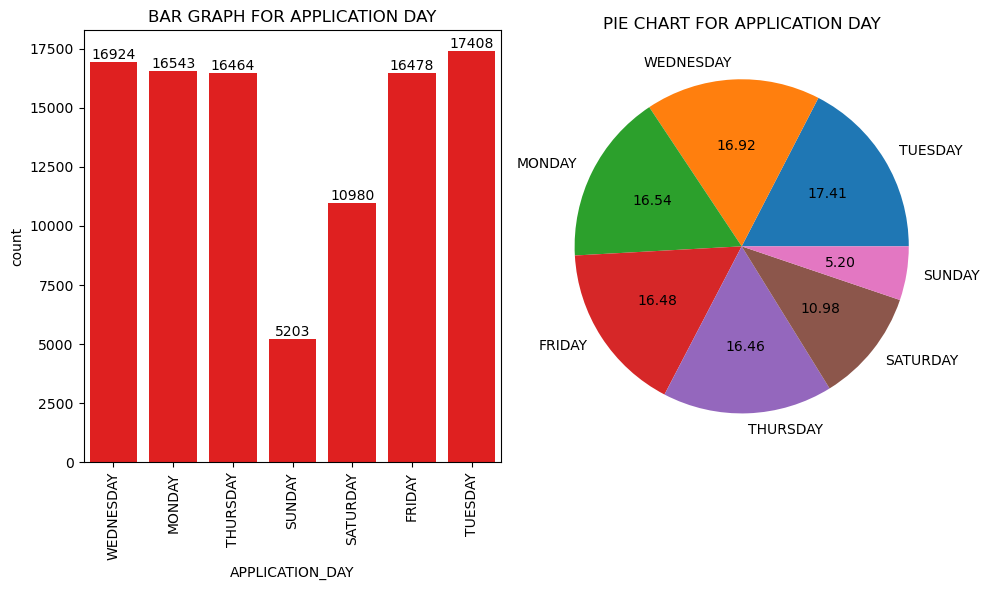

In [21]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
q=cat['APPLICATION_DAY'].value_counts().index
w=cat['APPLICATION_DAY'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['APPLICATION_DAY'],ax=ax[0],color='red')
for bar in ax[0].patches:
    count=f"{round(bar.get_height())}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax[0].annotate(count,(x,y),va='bottom',ha='center')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout() 
ax[0].set_title('BAR GRAPH FOR APPLICATION DAY')
ax[1].set_title('PIE CHART FOR APPLICATION DAY')
plt.tight_layout()
plt.show()

# Lot of Application Submitted In Tuesday

# 2. CAR

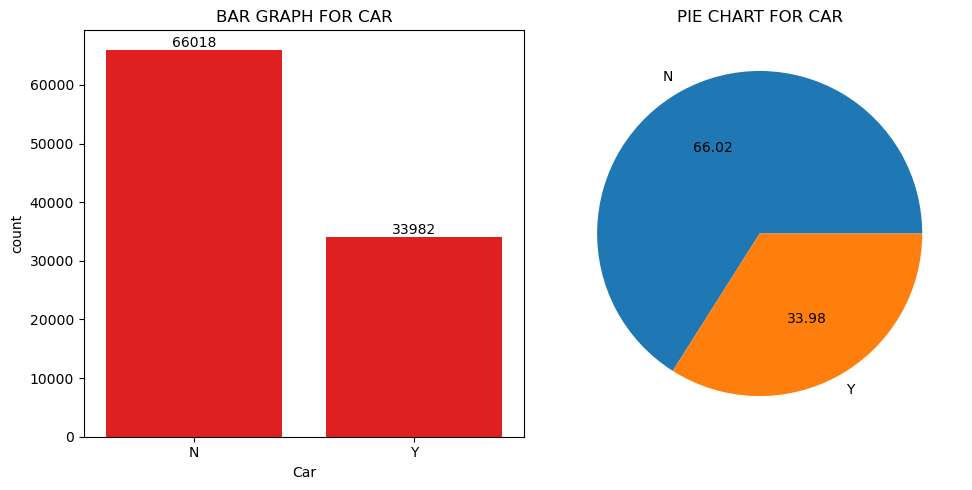

In [22]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['Car'].value_counts().index
w=cat['Car'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['Car'],ax=ax[0],color='red')
cb(ax[0],bank)
ax[0].set_title('BAR GRAPH FOR CAR')
ax[1].set_title('PIE CHART FOR CAR')
plt.tight_layout()
plt.show()

#  Near By 34 % People Only Have Car

# 3. GENDER

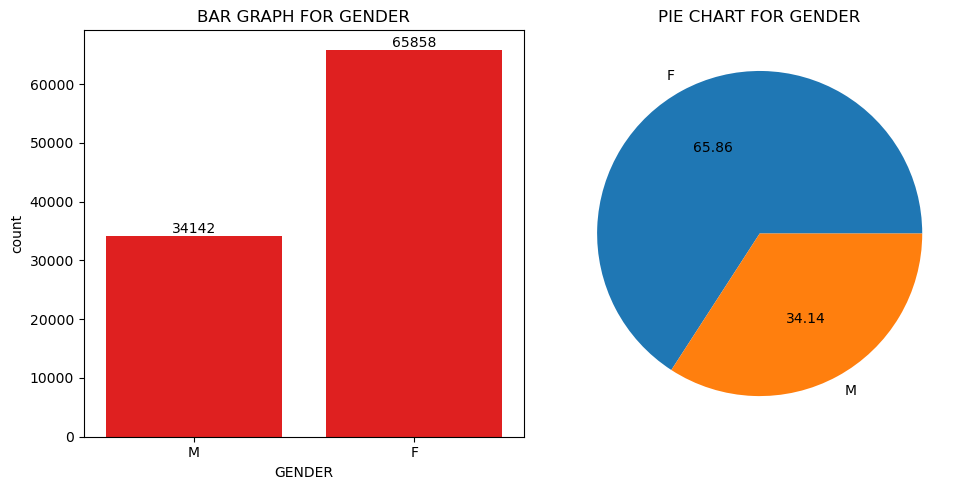

In [24]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['GENDER'].value_counts().index
w=cat['GENDER'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['GENDER'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR GENDER')
ax[1].set_title('PIE CHART FOR GENDER')
plt.tight_layout()
plt.show()

# 66% customers are Female

# 4.HOUSE

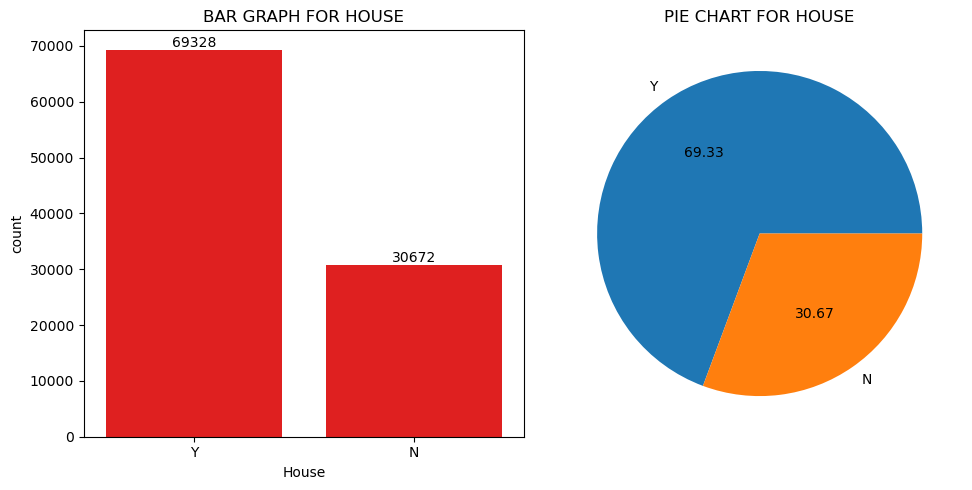

In [25]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['House'].value_counts().index
w=cat['House'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['House'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR HOUSE')
ax[1].set_title('PIE CHART FOR HOUSE')
plt.tight_layout()
plt.show()


# Near by 70% people have own house.

# 5. NAME CONTRACT TYPE

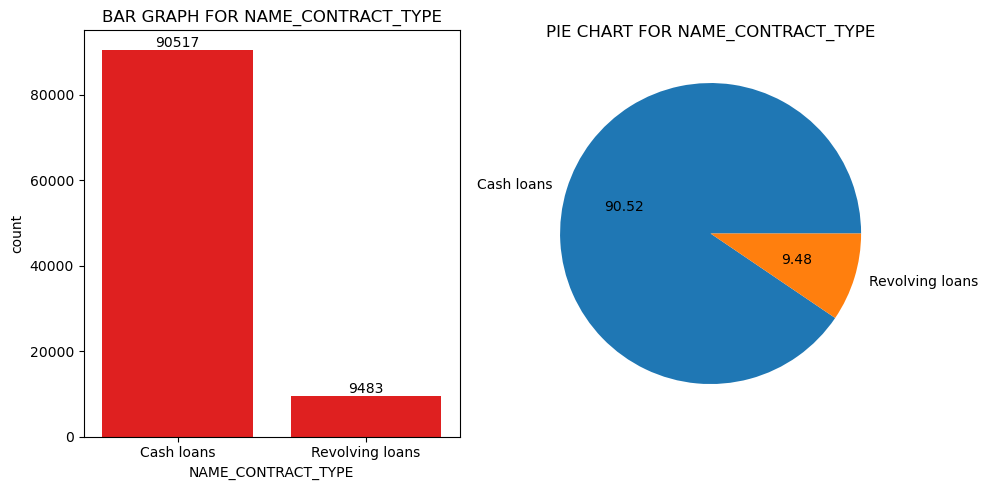

In [26]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['NAME_CONTRACT_TYPE'].value_counts().index
w=cat['NAME_CONTRACT_TYPE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['NAME_CONTRACT_TYPE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR NAME_CONTRACT_TYPE')
ax[1].set_title('PIE CHART FOR NAME_CONTRACT_TYPE')
plt.tight_layout()
plt.show()

# Near by 91% peoples wants money through cash.

# 6. NAME EDUCATION TYPE

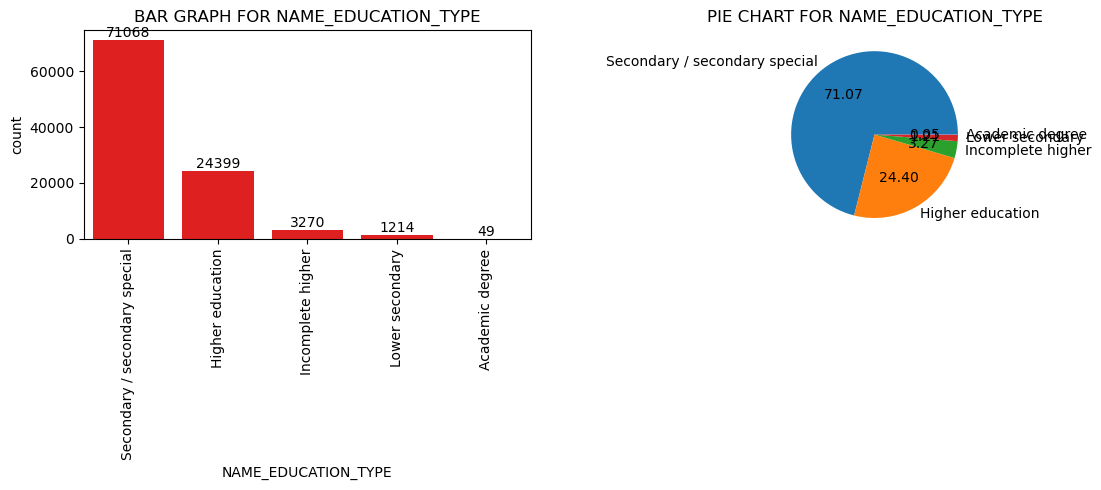

In [27]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
q=cat['NAME_EDUCATION_TYPE'].value_counts().index
w=cat['NAME_EDUCATION_TYPE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['NAME_EDUCATION_TYPE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR NAME_EDUCATION_TYPE')
ax[1].set_title('PIE CHART FOR NAME_EDUCATION_TYPE')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

# Maximum No of peoples study only  secondary or secondary special

# 7. NAME FAMILY TYPE

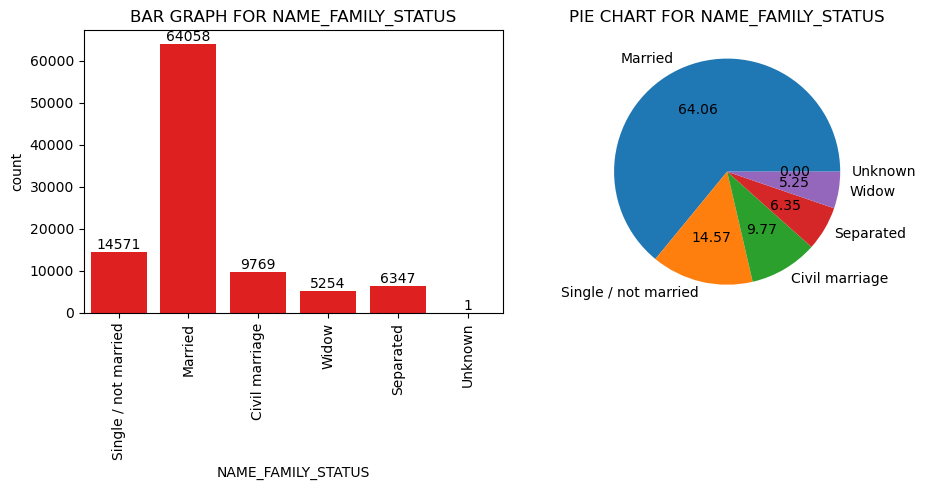

In [28]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=bank['NAME_FAMILY_STATUS'].value_counts().index
w=bank['NAME_FAMILY_STATUS'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=bank['NAME_FAMILY_STATUS'],ax=ax[0],color='red')
plt.xticks(rotation=90)
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR NAME_FAMILY_STATUS')
ax[1].set_title('PIE CHART FOR NAME_FAMILY_STATUS')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

# Lot of married persons apply for the loan

# 8. NAME INCOME TYPE

In [29]:
bank['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

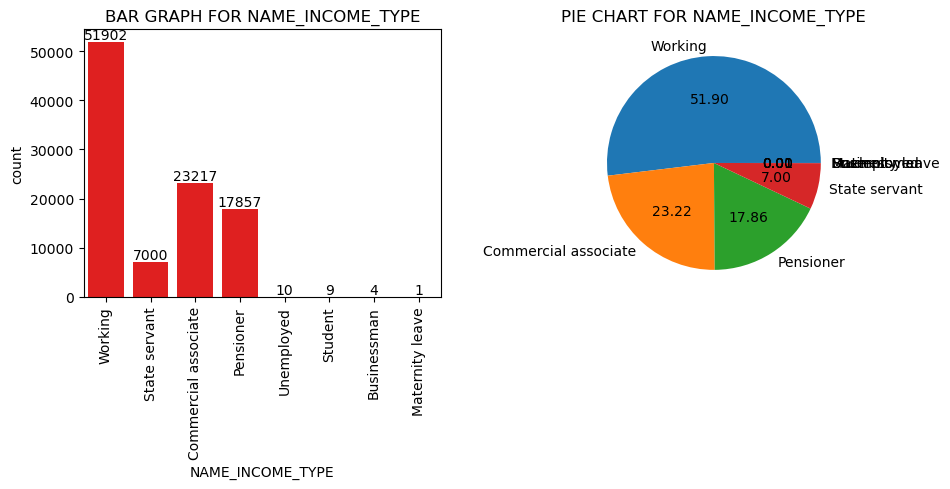

In [30]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=bank['NAME_INCOME_TYPE'].value_counts().index
w=bank['NAME_INCOME_TYPE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=bank['NAME_INCOME_TYPE'],ax=ax[0],color='red')
plt.xticks(rotation=90)
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR NAME_INCOME_TYPE')
ax[1].set_title('PIE CHART FOR NAME_INCOME_TYPE')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

# Maximum peoples are working

# 9. NAME TYPE SUITE

In [31]:
bank['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

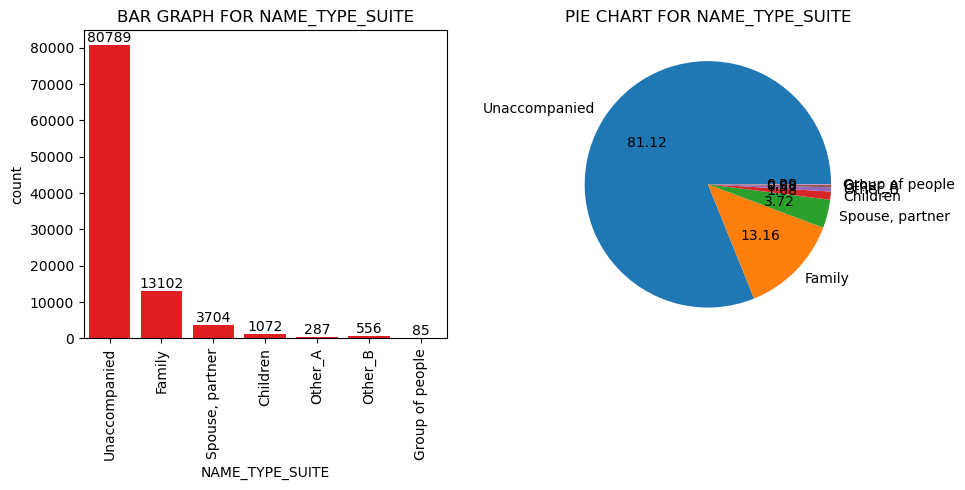

In [32]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=bank['NAME_TYPE_SUITE'].value_counts().index
w=bank['NAME_TYPE_SUITE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=bank['NAME_TYPE_SUITE'],ax=ax[0],color='red')
plt.xticks(rotation=90)
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR NAME_TYPE_SUITE')
ax[1].set_title('PIE CHART FOR NAME_TYPE_SUITE')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Unaccompained peoples are apply the loan near by 82%

# 10.OCCUPATION TYPE

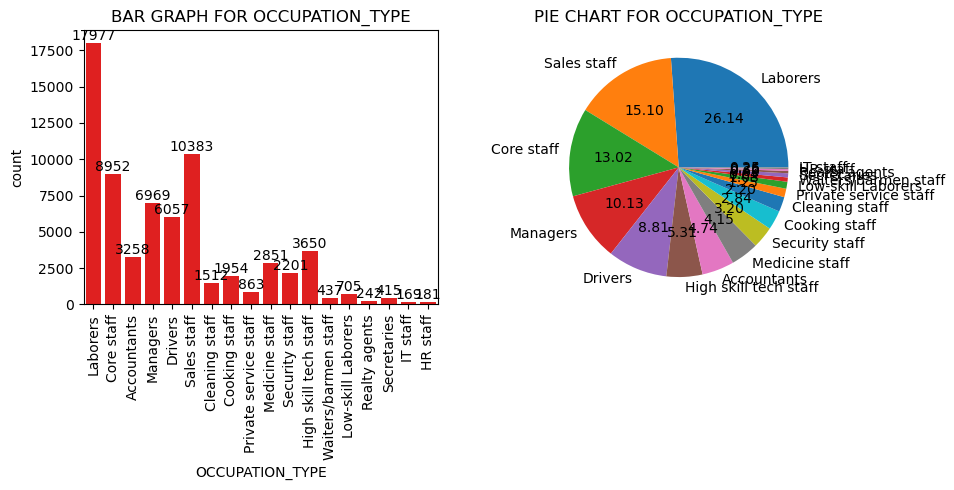

In [33]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['OCCUPATION_TYPE'].value_counts().index
w=cat['OCCUPATION_TYPE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['OCCUPATION_TYPE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR OCCUPATION_TYPE')
ax[1].set_title('PIE CHART FOR OCCUPATION_TYPE')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# 50% Laborers are apply the loan

# 11. TARGET

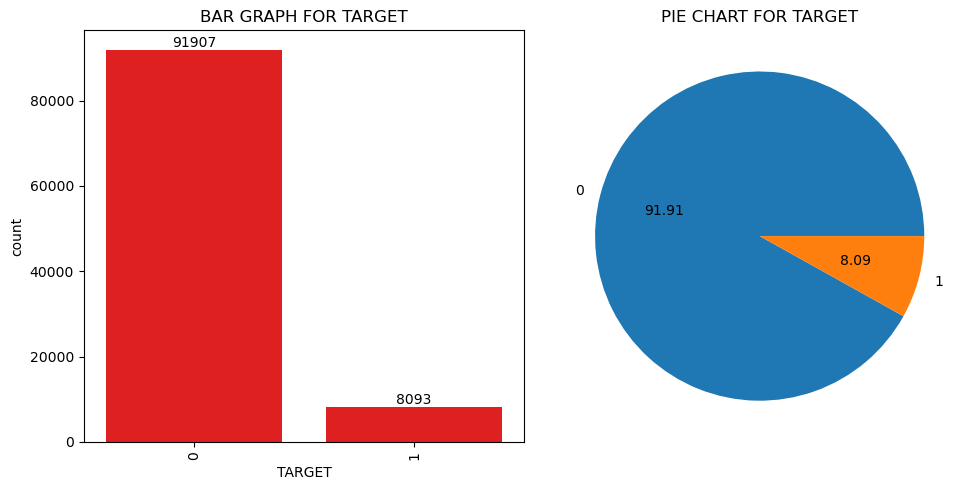

In [34]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['TARGET'].value_counts().index
w=cat['TARGET'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['TARGET'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR TARGET')
ax[1].set_title('PIE CHART FOR TARGET')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

#  Almost 92% peoples paying good

# 12. CNT CHILDREN

In [35]:
bank['CNT_CHILDREN'].unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12], dtype=int64)

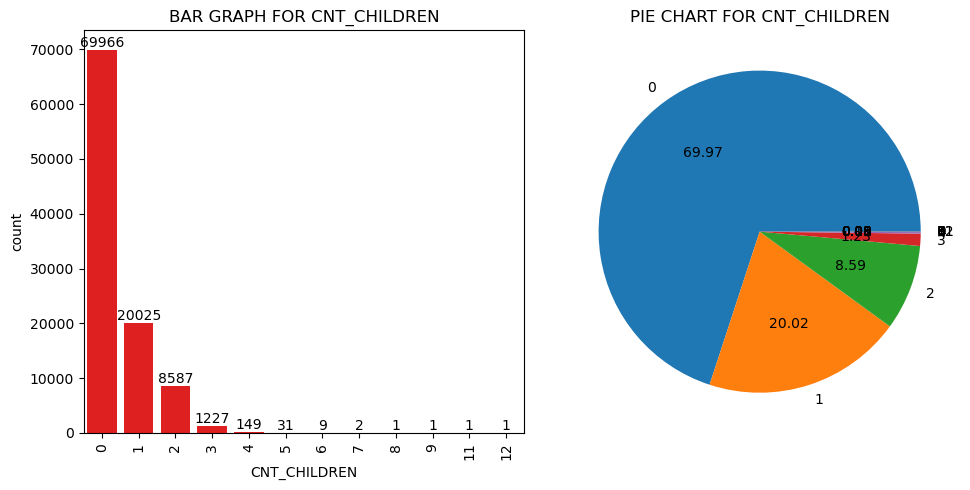

In [36]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=bank['CNT_CHILDREN'].value_counts().index
w=bank['CNT_CHILDREN'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=bank['CNT_CHILDREN'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR CNT_CHILDREN')
ax[1].set_title('PIE CHART FOR CNT_CHILDREN')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Near by 70 % peoples dont have a child.

# 12. MOBILE

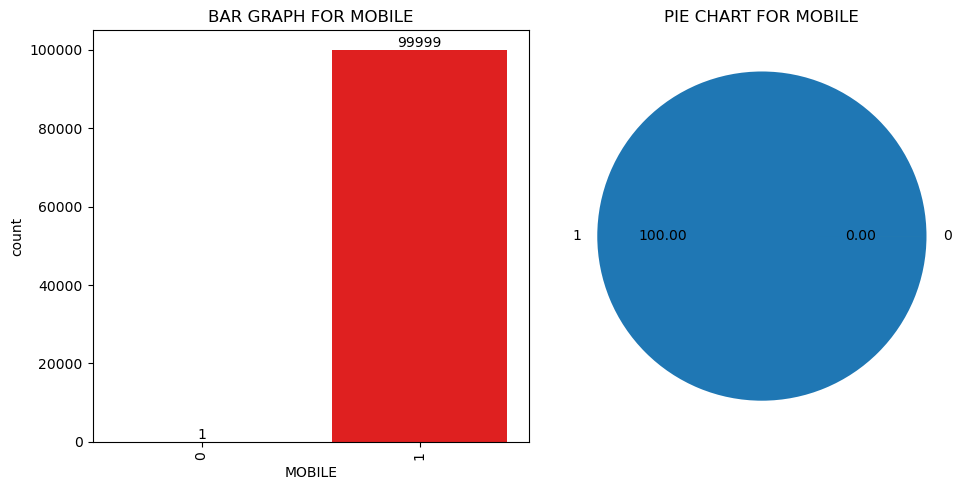

In [37]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['MOBILE'].value_counts().index
w=cat['MOBILE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['MOBILE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR MOBILE')
ax[1].set_title('PIE CHART FOR MOBILE')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Almost all are have a mobile.

# 13. WORK PHONE

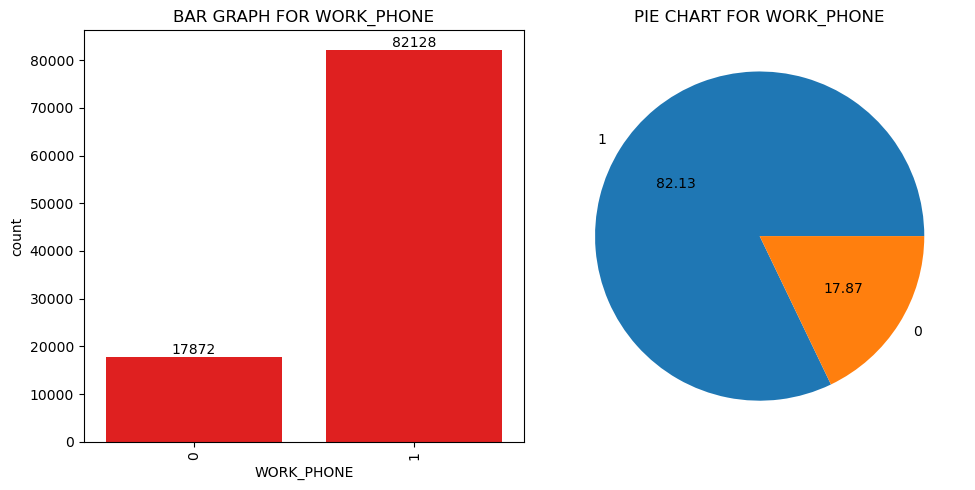

In [38]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['WORK_PHONE'].value_counts().index
w=cat['WORK_PHONE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['WORK_PHONE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR WORK_PHONE')
ax[1].set_title('PIE CHART FOR WORK_PHONE')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Near by 82% people have work phone.

# 14. HOME PHONE

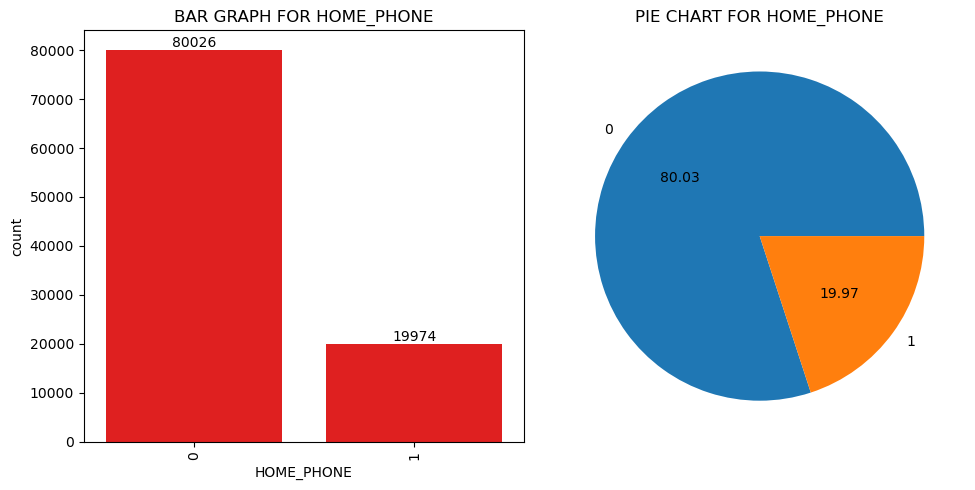

In [39]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['HOME_PHONE'].value_counts().index
w=cat['HOME_PHONE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['HOME_PHONE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR HOME_PHONE')
ax[1].set_title('PIE CHART FOR HOME_PHONE')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Near by 80% people have home phone

# 15.MOBILE REACHABLE

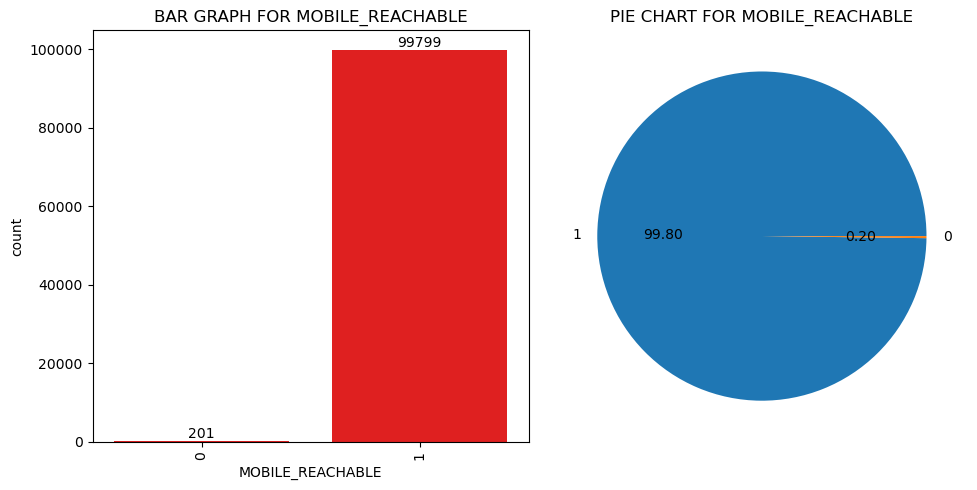

In [40]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['MOBILE_REACHABLE'].value_counts().index
w=cat['MOBILE_REACHABLE'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['MOBILE_REACHABLE'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR MOBILE_REACHABLE')
ax[1].set_title('PIE CHART FOR MOBILE_REACHABLE')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Almost all are mobile reachable.

# 16.FLAG EMAIL

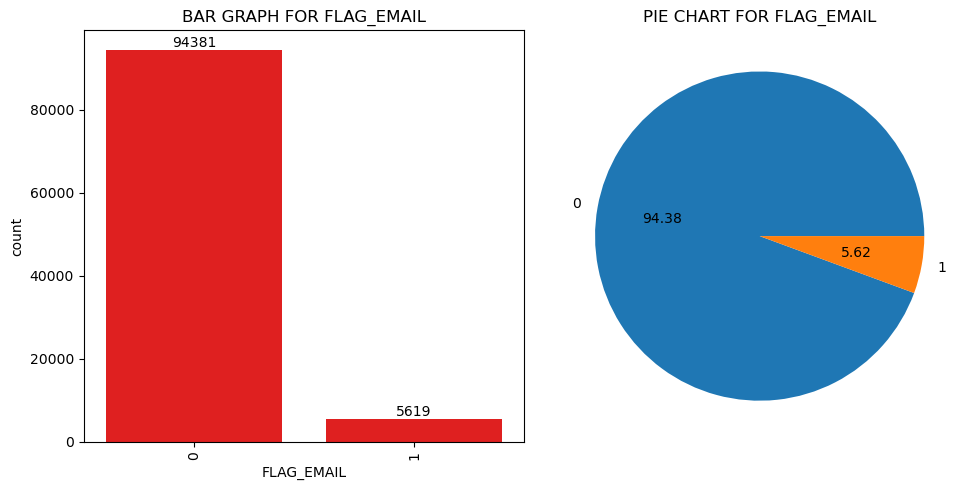

In [41]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=cat['FLAG_EMAIL'].value_counts().index
w=cat['FLAG_EMAIL'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=cat['FLAG_EMAIL'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR FLAG_EMAIL')
ax[1].set_title('PIE CHART FOR FLAG_EMAIL')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# 95% people share their email.

# 17. CNT FAM MEMBERS

In [42]:
bank['CNT_FAM_MEMBERS'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.])

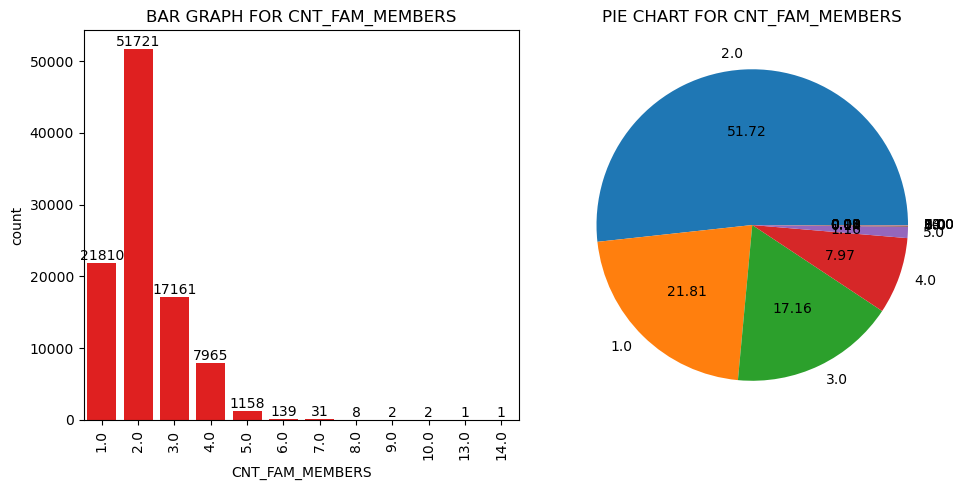

In [43]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=bank['CNT_FAM_MEMBERS'].value_counts().index
w=bank['CNT_FAM_MEMBERS'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=bank['CNT_FAM_MEMBERS'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR CNT_FAM_MEMBERS')
ax[1].set_title('PIE CHART FOR CNT_FAM_MEMBERS')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

# Near by 52% family have 2 family members.

# 18. TOTAL DOC SUBMITTED

In [44]:
bank['TOTAL_DOC_SUBMITTED'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

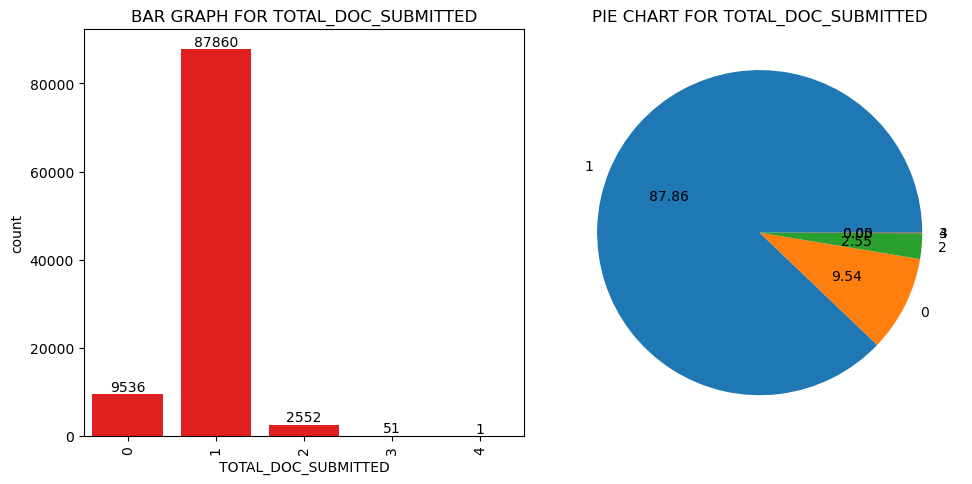

In [45]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
q=bank['TOTAL_DOC_SUBMITTED'].value_counts().index
w=bank['TOTAL_DOC_SUBMITTED'].value_counts().values
ax[1].pie(x=w,labels=q,autopct='%.2f')
sb.countplot(x=bank['TOTAL_DOC_SUBMITTED'],ax=ax[0],color='red')
cb(ax[0],num)
ax[0].set_title('BAR GRAPH FOR TOTAL_DOC_SUBMITTED')
ax[1].set_title('PIE CHART FOR TOTAL_DOC_SUBMITTED')
plt.tight_layout()
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.show()

# 88% peoples submitted only one document.

# Level 1 Analysis  - Univariate Analysis  For Numerical Columns

In [46]:
print(num.columns)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'DAYS_EMPLOYED'],
      dtype='object')


# Checking Missing Values

In [47]:
for i in num.columns:
    if data[i].isnull().sum()==0:
        print(i)
        print(f"Missing value : {data[i].isnull().sum()}")    
        print(f"Mean value : {data[i].mean()}")
        print(f"Median value : {data[i].median()}")
        print(f"Nunique value : {[i].nunique()}")  
        print('\n')

SK_ID_CURR
Missing value : 0
Mean value : 158006.14086
Median value : 157877.0
Nunique value : 100000


AMT_INCOME_TOTAL
Missing value : 0
Mean value : 169426.07027325002
Median value : 144000.0
Nunique value : 1212


AMT_CREDIT
Missing value : 0
Mean value : 599003.4465
Median value : 513040.5
Nunique value : 4162


AMT_GOODS_PRICE
Missing value : 0
Mean value : 538345.14885
Median value : 450000.0
Nunique value : 624


DAYS_EMPLOYED
Missing value : 0
Mean value : 63292.22206
Median value : -1219.0
Nunique value : 9871




# 1.AMT CREDIT

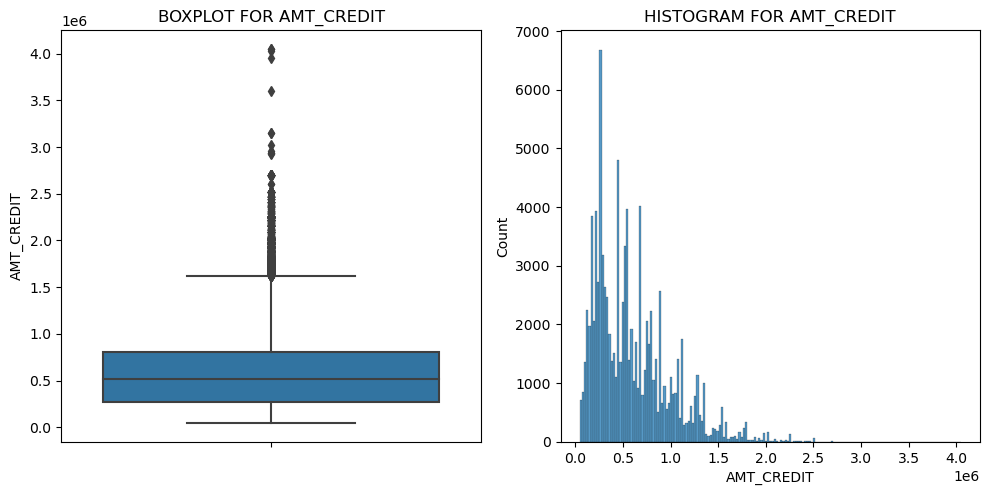

In [48]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['AMT_CREDIT'],ax=ax[0])
sb.histplot(x=num['AMT_CREDIT'],ax=ax[1])
plt.tight_layout()
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR AMT_CREDIT')
ax[1].set_title('HISTOGRAM FOR AMT_CREDIT')
plt.show()

# Almost lot of people wants their loan amount range between 45000 to 150000

# 2. AMT GOOD PRICE

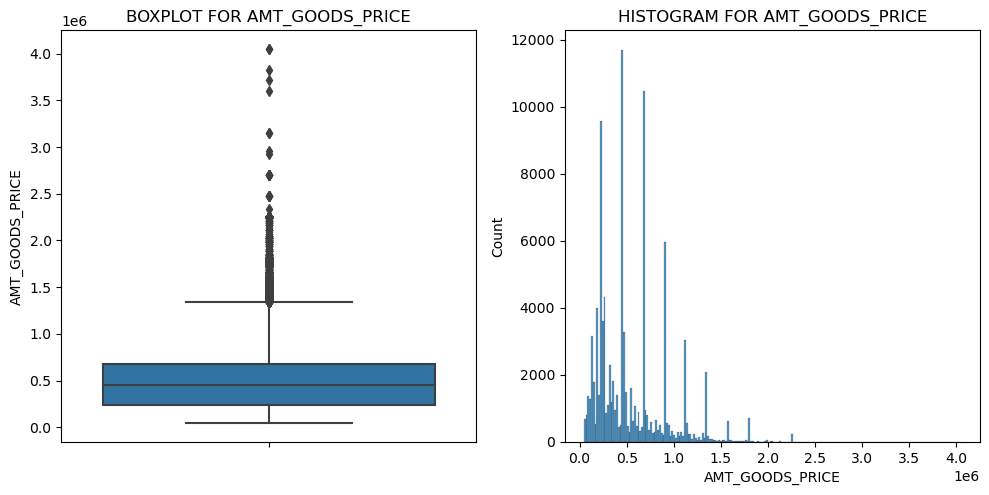

In [49]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['AMT_GOODS_PRICE'],ax=ax[0])
sb.histplot(x=num['AMT_GOODS_PRICE'],ax=ax[1])
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR AMT_GOODS_PRICE')
ax[1].set_title('HISTOGRAM FOR AMT_GOODS_PRICE')
plt.show()

# Customers Good price amount range between 10000 to 130000

# 3. SK ID CURR

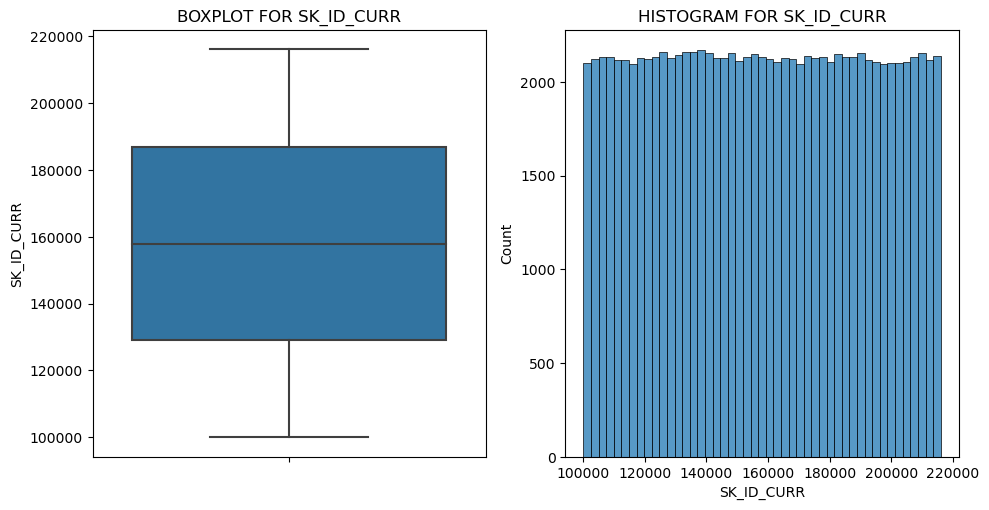

In [50]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['SK_ID_CURR'],ax=ax[0])
sb.histplot(x=num['SK_ID_CURR'],ax=ax[1])
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR SK_ID_CURR')
ax[1].set_title('HISTOGRAM FOR SK_ID_CURR')
plt.show()

# This is customer id

# OUTLIER TREATMENT

# 4. AMT INCOME TOTAL

In [51]:
num['AMT_INCOME_TOTAL'].mean()

169426.07027325002

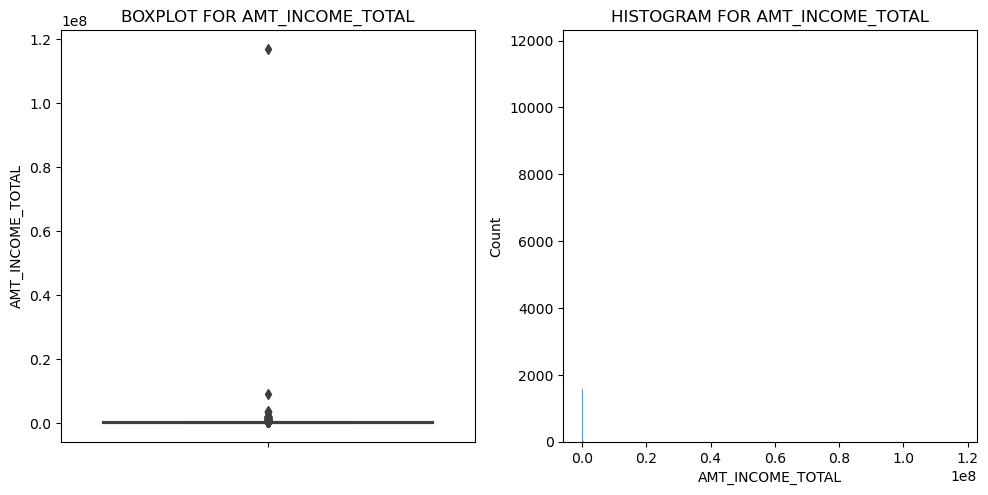

In [52]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['AMT_INCOME_TOTAL'],ax=ax[0])
sb.histplot(x=num['AMT_INCOME_TOTAL'],ax=ax[1])
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR AMT_INCOME_TOTAL')
ax[1].set_title('HISTOGRAM FOR AMT_INCOME_TOTAL')
plt.show()

In [53]:
mean=num['AMT_INCOME_TOTAL'].mean()
s=num[num['AMT_INCOME_TOTAL']>200000].index
for index in s:
    num.loc[index,'AMT_INCOME_TOTAL']=mean

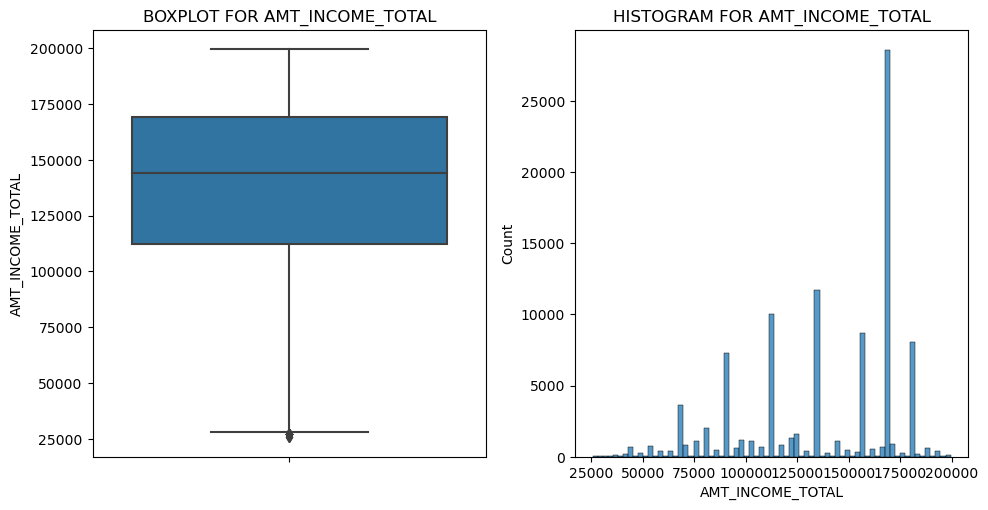

In [55]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['AMT_INCOME_TOTAL'],ax=ax[0])
sb.histplot(x=num['AMT_INCOME_TOTAL'],ax=ax[1])
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR AMT_INCOME_TOTAL')
ax[1].set_title('HISTOGRAM FOR AMT_INCOME_TOTAL')
plt.show()

# Almost lot of peoples income comes 100000 to 175000

# 5. DAYS EMPLOYEED

In [52]:
num['DAYS_EMPLOYED'].mean()

63292.22206

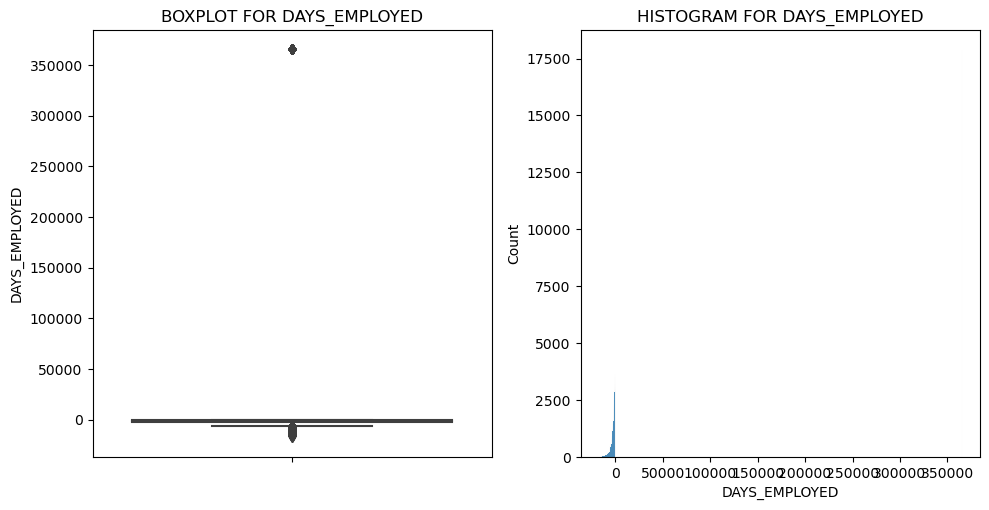

In [53]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['DAYS_EMPLOYED'],ax=ax[0])
sb.histplot(x=num['DAYS_EMPLOYED'],ax=ax[1])
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR DAYS_EMPLOYED')
ax[1].set_title('HISTOGRAM FOR DAYS_EMPLOYED')
plt.show()

In [54]:
mean=num['DAYS_EMPLOYED'].mean()
s=num[num['DAYS_EMPLOYED']>0].index
for index in s:
    num.loc[index,'DAYS_EMPLOYED']=mean

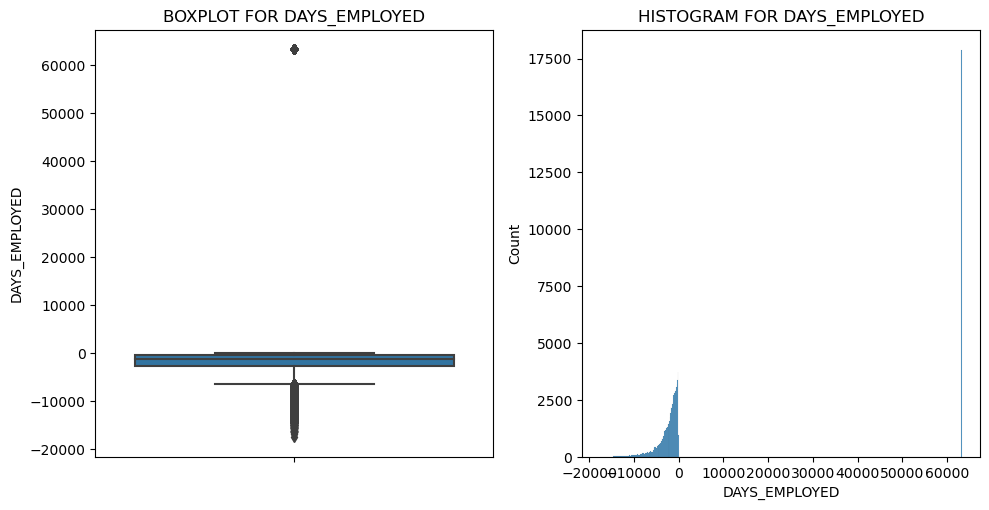

In [55]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=num['DAYS_EMPLOYED'],ax=ax[0])
sb.histplot(x=num['DAYS_EMPLOYED'],ax=ax[1])
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR DAYS_EMPLOYED')
ax[1].set_title('HISTOGRAM FOR DAYS_EMPLOYED')
plt.show()

# Lot of persons working near by 5000 days

# LEVEL 2 ANALYSIS - Univariate Analysis

In [56]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [57]:
cat.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [58]:
num.columns

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'DAYS_EMPLOYED'],
      dtype='object')

# TARGET VS CNT FAMILY MEMERS AND CNT CHILDRENS

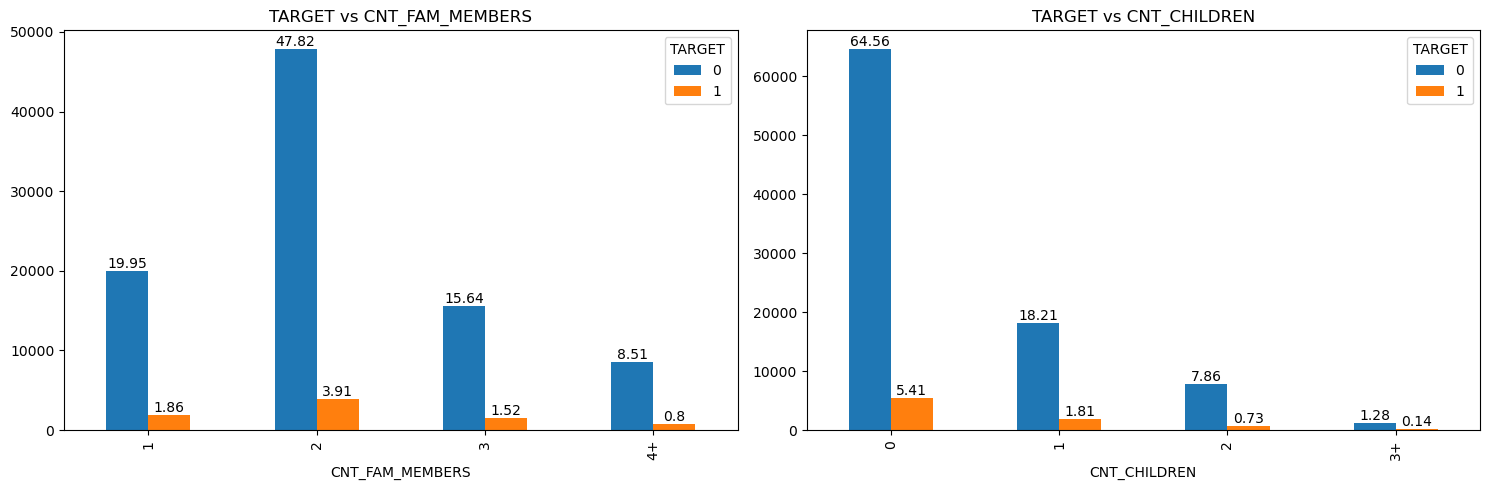

In [73]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
pd.crosstab(index=data['CNT_FAM_MEMBERS'],columns=data['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=data['CNT_CHILDREN'],columns=data['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],data)
cp(ax[1],data)
ax[0].set_title('TARGET vs CNT_FAM_MEMBERS')
ax[1].set_title('TARGET vs CNT_CHILDREN')
plt.tight_layout()
plt.show()

#
* In 2 members family 48% pay properly.
* 65% paying on time who dont have child.

# TARGET VS NAPPLICATION DAY AND CAR

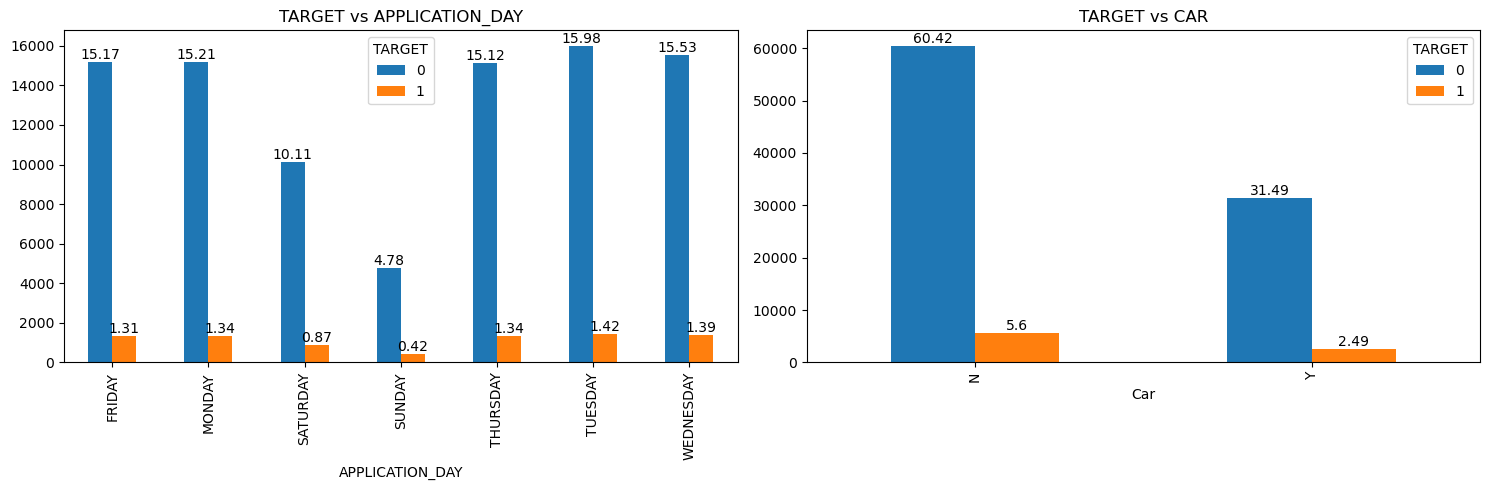

In [74]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
pd.crosstab(index=data['APPLICATION_DAY'],columns=data['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=data['Car'],columns=data['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],data)
cp(ax[1],data)
ax[0].set_title('TARGET vs APPLICATION_DAY')
ax[1].set_title('TARGET vs CAR')
plt.tight_layout()
plt.show()

#
* Day Doesnt affect the repayment. Even through Tuesday and Wednesday who get loan they are paying properly.
* 60 % peoples dont have car but they pay on time.

# TARGET VS GENDER AND HOUSE

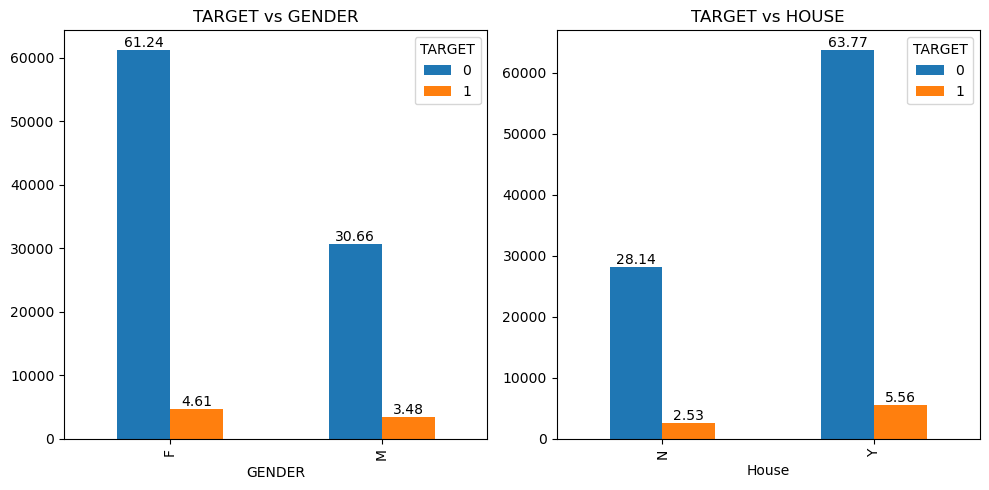

In [75]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=data['GENDER'],columns=data['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=data['House'],columns=data['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],data)
cp(ax[1],data)
ax[0].set_title('TARGET vs GENDER')
ax[1].set_title('TARGET vs HOUSE')
plt.tight_layout()
plt.show()

# 
* Alomost 61% female pay on time.
* 64% who have house they pay on time.

# TARGET VS MOBILE AND MOBILE REACHABLE

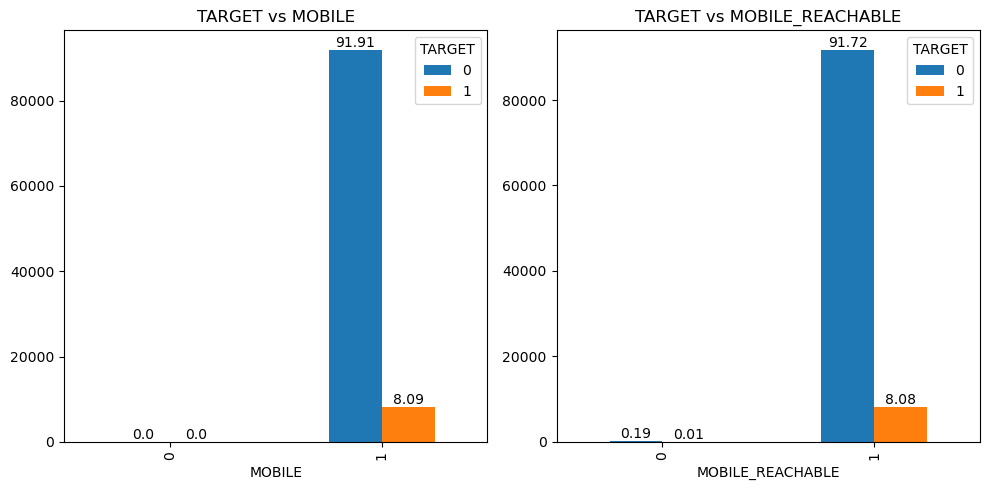

In [76]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=data['MOBILE'],columns=data['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=data['MOBILE_REACHABLE'],columns=data['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],data)
cp(ax[1],data)
ax[0].set_title('TARGET vs MOBILE')
ax[1].set_title('TARGET vs MOBILE_REACHABLE')
plt.tight_layout()
plt.show()

#
* 92% people paying on time they have mobile.
* 92% peoples phone reachable they pay on time.

# TARGET VS NAME CONTRACT TYPE AND OCCUPATION TYPE

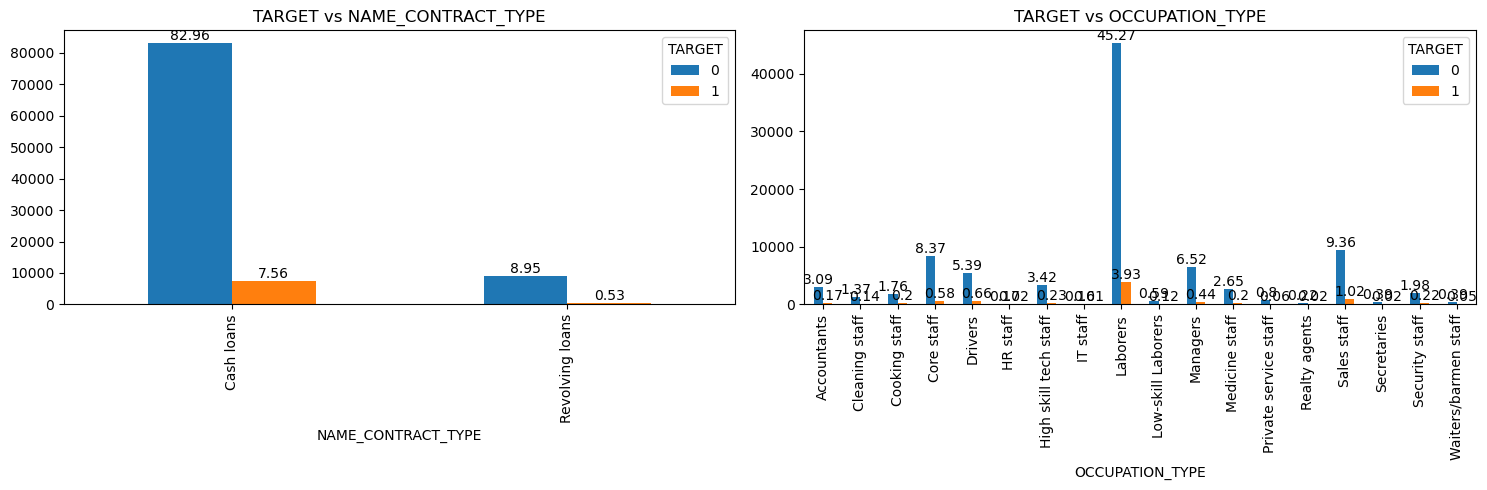

In [77]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
pd.crosstab(index=data['NAME_CONTRACT_TYPE'],columns=data['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=data['OCCUPATION_TYPE'],columns=data['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],data)
cp(ax[1],data)
ax[0].set_title('TARGET vs NAME_CONTRACT_TYPE')
ax[1].set_title('TARGET vs OCCUPATION_TYPE')
plt.tight_layout()
plt.show()

# 
* 83% cash loan repay on time
* 45 % labours are pay loan on time. 

# TARGET VS NAME EDUCATION TYPE AND NAME FAMILY TYPE

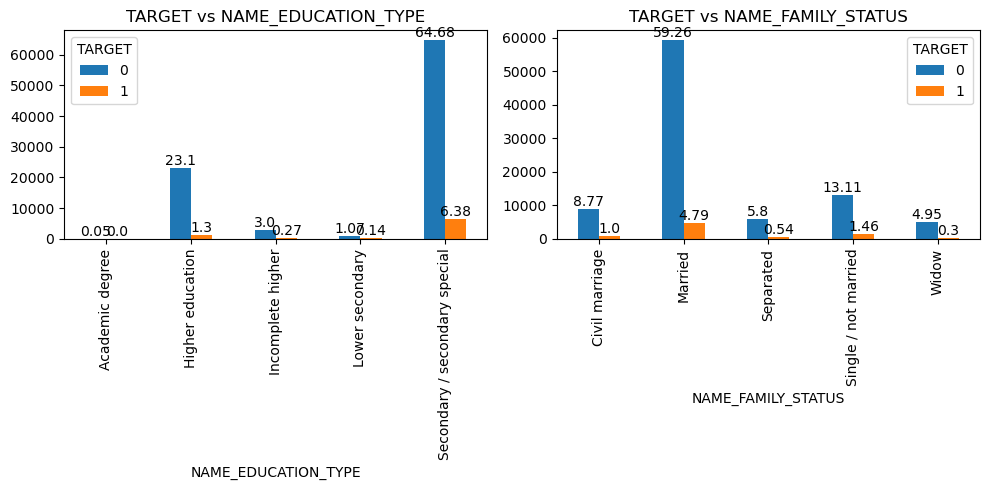

In [78]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=data['NAME_EDUCATION_TYPE'],columns=data['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=data['NAME_FAMILY_STATUS'],columns=data['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],data)
cp(ax[1],data)
ax[0].set_title('TARGET vs NAME_EDUCATION_TYPE')
ax[1].set_title('TARGET vs NAME_FAMILY_STATUS')
plt.tight_layout()
plt.show()

# 
* 65 % secondary special study peoples pay on time.
* 59 % married peoples pay on time.

# TARGET VS NAME INCOME TYPE AND NAME TYPE SUITE

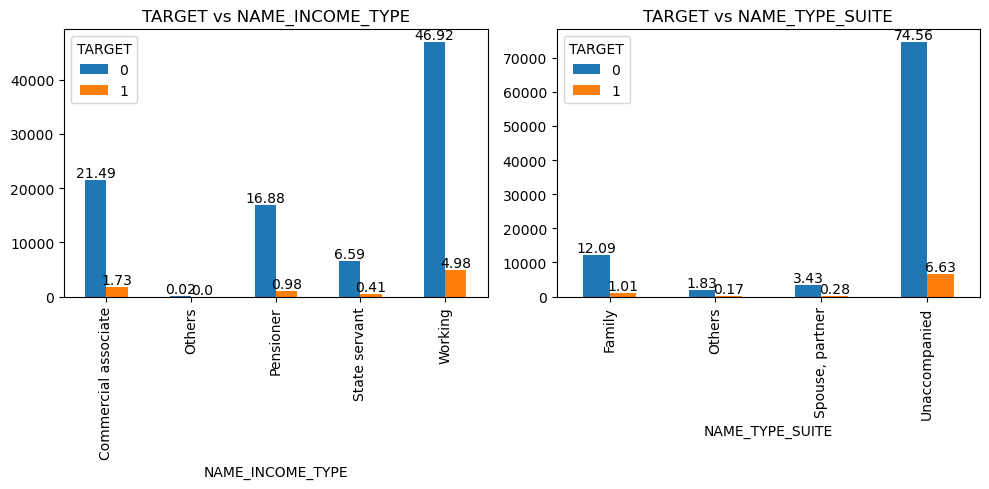

In [79]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=data['NAME_INCOME_TYPE'],columns=data['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=data['NAME_TYPE_SUITE'],columns=data['TARGET']).plot(kind='bar',ax=ax[1])
cp(ax[0],data)
cp(ax[1],data)
ax[0].set_title('TARGET vs NAME_INCOME_TYPE')
ax[1].set_title('TARGET vs NAME_TYPE_SUITE')
plt.tight_layout()
plt.show()

# 
* 47% working peoples are pay on time.
* 75 % unaccompanied peoples are repay on time.

# TARGET VS TOTAL DOC SUBMITTED AND WORK PHONE

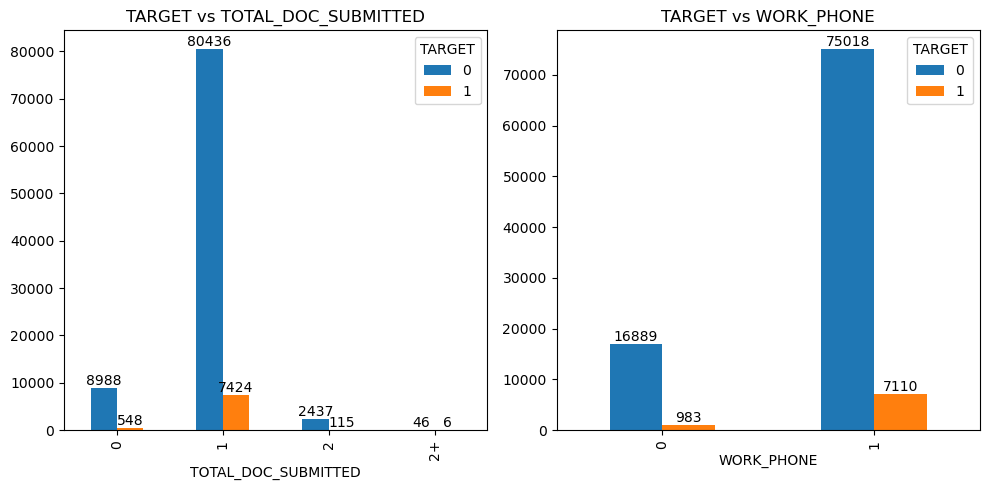

In [80]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=data['TOTAL_DOC_SUBMITTED'],columns=data['TARGET']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=data['WORK_PHONE'],columns=data['TARGET']).plot(kind='bar',ax=ax[1])
cb(ax[0],data)
cb(ax[1],data)
ax[0].set_title('TARGET vs TOTAL_DOC_SUBMITTED')
ax[1].set_title('TARGET vs WORK_PHONE')
plt.tight_layout()
plt.show()

#
* 80% of peoples only 1 document submited. but they pay on time.
* 75 % people have work phone and pay also on time.

# LEVEL 3 ANALYSIS - Multivariate Anlaysis

In [68]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

# Who's are become a low defaulter using their family members count with their income 

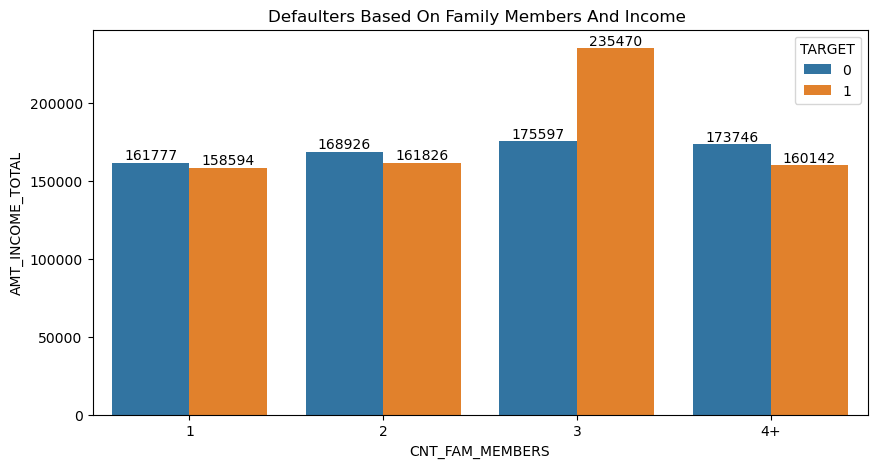

In [69]:
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(x=data['CNT_FAM_MEMBERS'],y=data['AMT_INCOME_TOTAL'],hue=data['TARGET'],ci=False)
cb(ax,data)
plt.title('Defaulters Based On Family Members And Income ')
plt.show()

#
* Family members count which family have 2 members. They are low probabelity to become a defaulter.
* Family members count which family have 3 members. They are high probabelity to become a defaulter.

# Who's are become a low defaulter using their children  count with their income

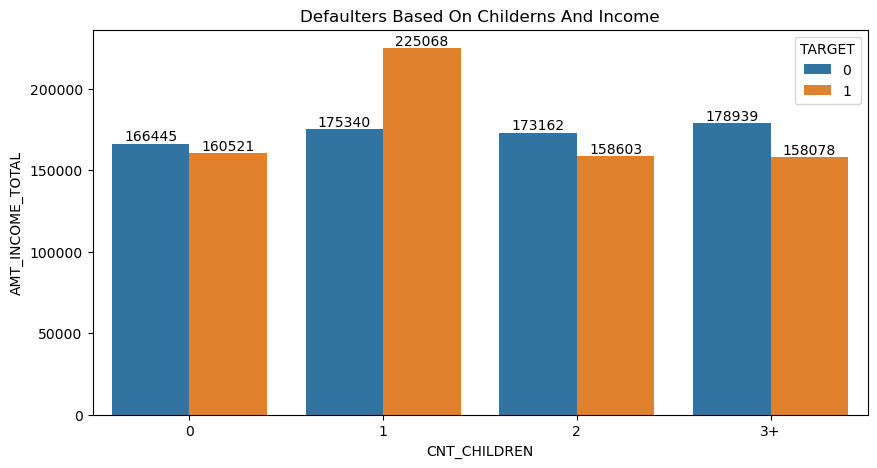

In [70]:
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(x=data['CNT_CHILDREN'],y=data['AMT_INCOME_TOTAL'],hue=data['TARGET'],ci=False)
cb(ax,data)
plt.title('Defaulters Based On Childerns And Income')
plt.show()

#
* Who have 2 children they are probabelity to be a low defaulter.
* Who have a one child high probabelity to be defaulter.

# How we find low defaulter using their income type and income.

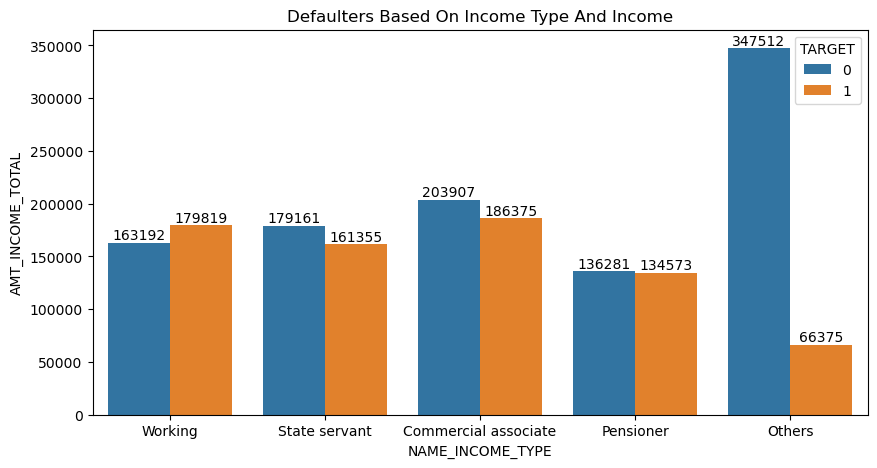

In [71]:
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(x=data['NAME_INCOME_TYPE'],y=data['AMT_INCOME_TOTAL'],hue=data['TARGET'],ci=False)
cb(ax,data)
plt.title('Defaulters Based On Income Type And Income')
plt.show()

# 
* Who are under the others and State servant are be a low defaulter.
* Working persons high possibality to be a defaulter.

# Which gender be a defaulter using their income.

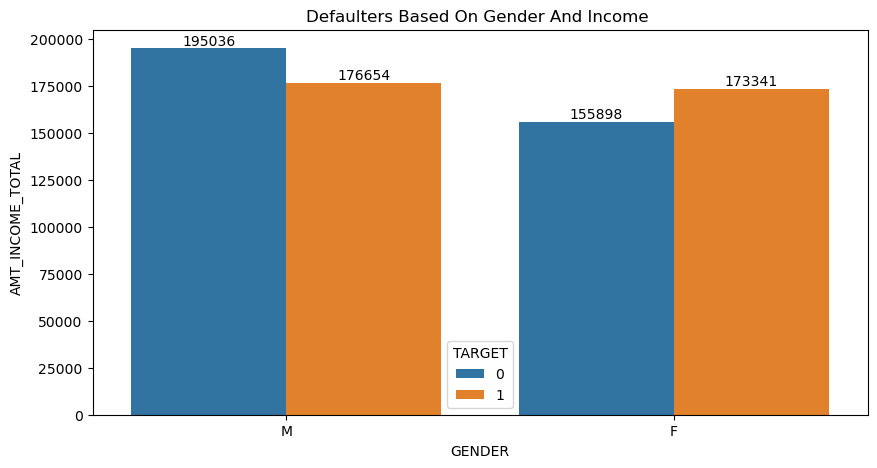

In [72]:
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(x=data['GENDER'],y=data['AMT_INCOME_TOTAL'],hue=data['TARGET'],ci=False)
cb(ax,data)
plt.title('Defaulters Based On Gender And Income ')
plt.show()

# 
* Males are low probabelity to become a defaulter.
* Females are high probabelity to become a defaulter.

# Find the defaulter using their  house 

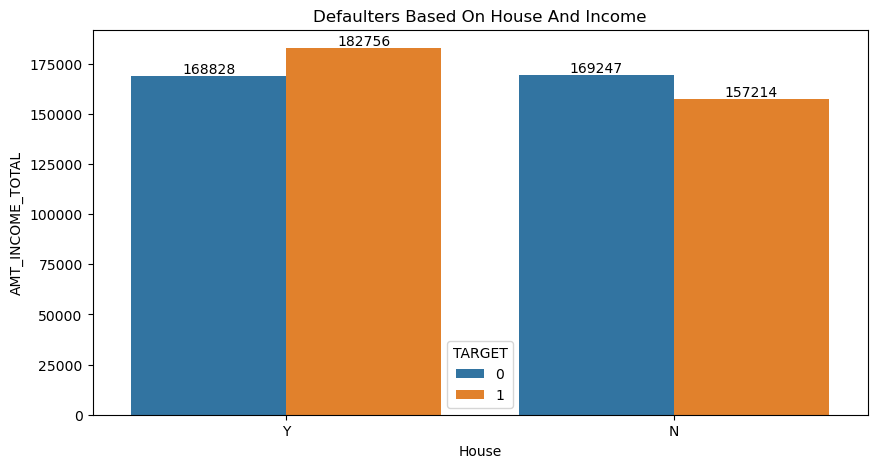

In [82]:
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(x=data['House'],y=data['AMT_INCOME_TOTAL'],hue=data['TARGET'],ci=False)
cb(ax,data)
plt.title('Defaulters Based On House And Income')
plt.show()

# 
* Who have not a house they are low probabelity to become a defaulter.
* Who have  a house they are high probabelity to become a defaulter.

# Find the defaulter using their car 

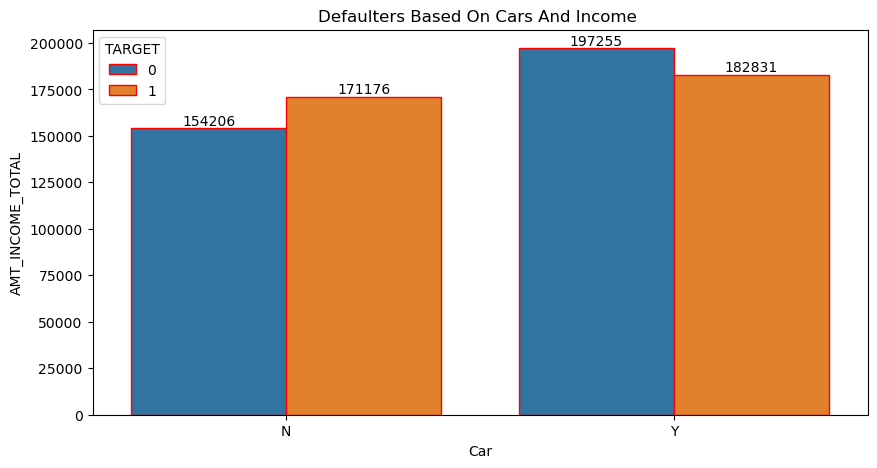

In [83]:
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(x=data['Car'],y=data['AMT_INCOME_TOTAL'],hue=data['TARGET'],ci=False,edgecolor='red')
cb(ax,data)
plt.title('Defaulters Based On Cars And Income ')
plt.show()

# 
* Who have cars they are low probabelity to become a defaulters.
* Who doesn't have cars they are high probabelity to become a defaulters.

# Finding defaulters their education type and income

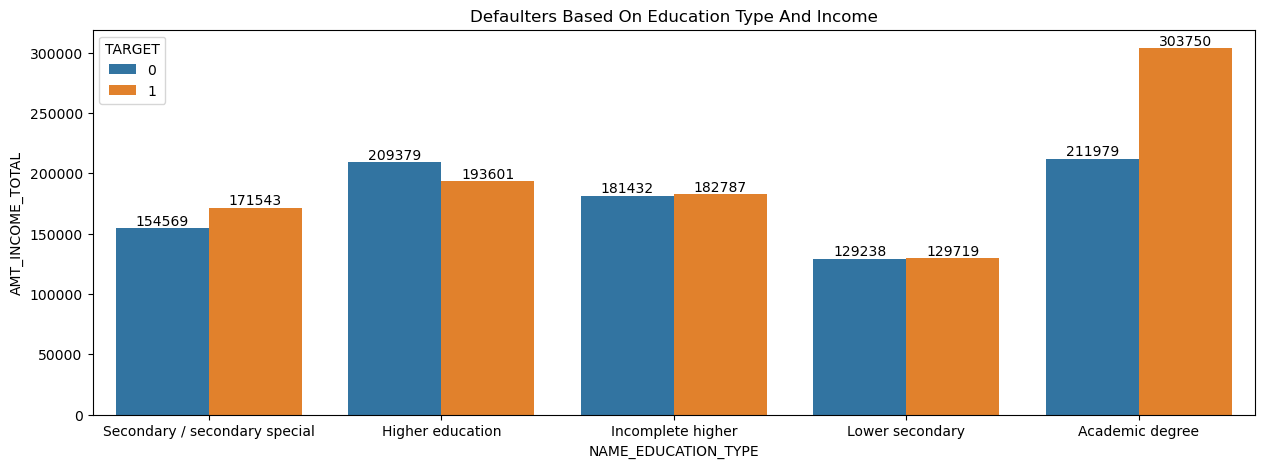

In [85]:
fig,ax=plt.subplots(figsize=(15,5))
sb.barplot(x=data['NAME_EDUCATION_TYPE'],y=data['AMT_INCOME_TOTAL'],hue=data['TARGET'],ci=False)
cb(ax,data)
plt.title('Defaulters Based On Education Type And Income')
plt.show()

# 
* Higher education studied applicant low possibility become a defaulter.
* Acadamic degree and secondary are high possibility to become a defaulter.

# Who are become a defaulter using their occupation and income

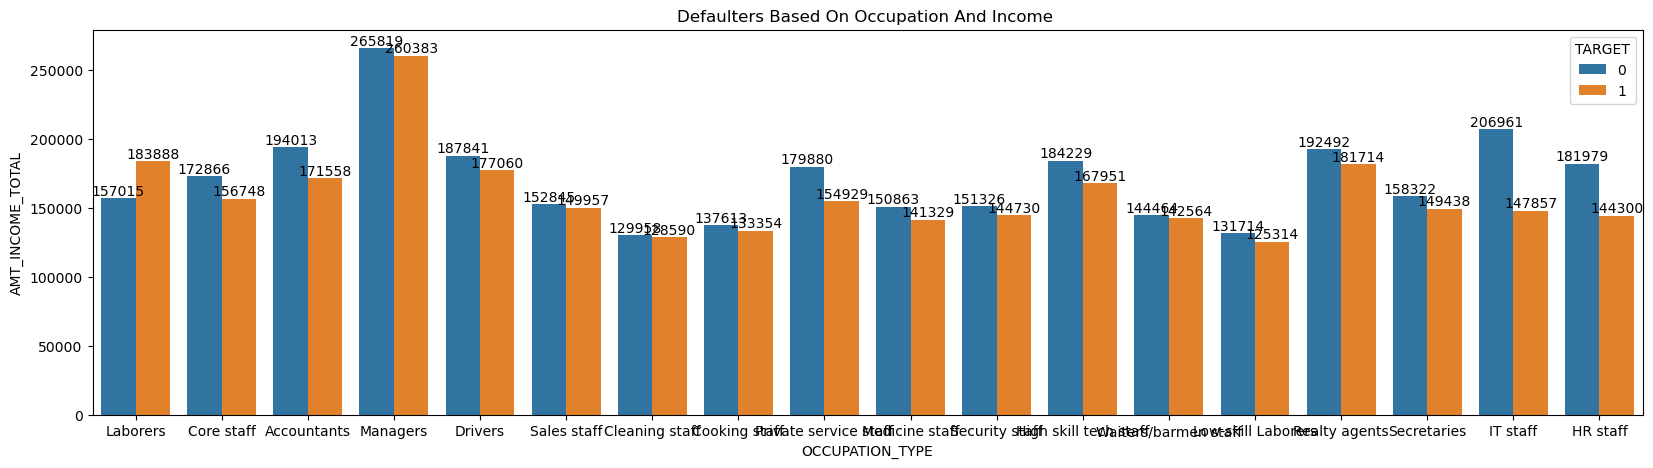

In [87]:
fig,ax=plt.subplots(figsize=(20,5))
sb.barplot(x=data['OCCUPATION_TYPE'],y=data['AMT_INCOME_TOTAL'],hue=data['TARGET'],ci=False)
cb(ax,data)
plt.title('Defaulters Based On Occupation And Income ')
plt.show()

#
* Manager, core staff, accountant,drivers,private service staff, Hr and It staff are low probabelity to become a defaulter.
* Laborers high possibility become a defaulter.

# Finding defaulters using loan type

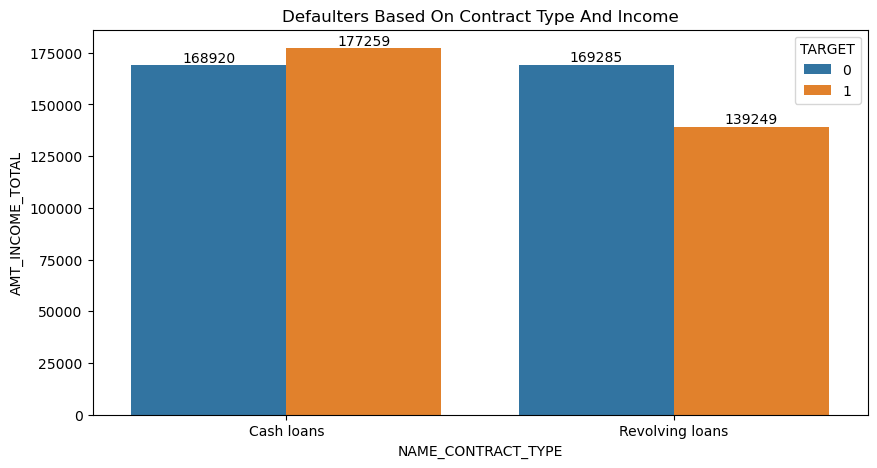

In [88]:
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(x=data['NAME_CONTRACT_TYPE'],y=data['AMT_INCOME_TOTAL'],hue=data['TARGET'],ci=False)
cb(ax,data)
plt.title('Defaulters Based On Contract Type And Income')
plt.show()

#
* Rovolving loans are low probability to become a defaulter.
* Cash loans are high probability to become a defaulter.

# Who are low defaulter using the amt credit vs gender and car

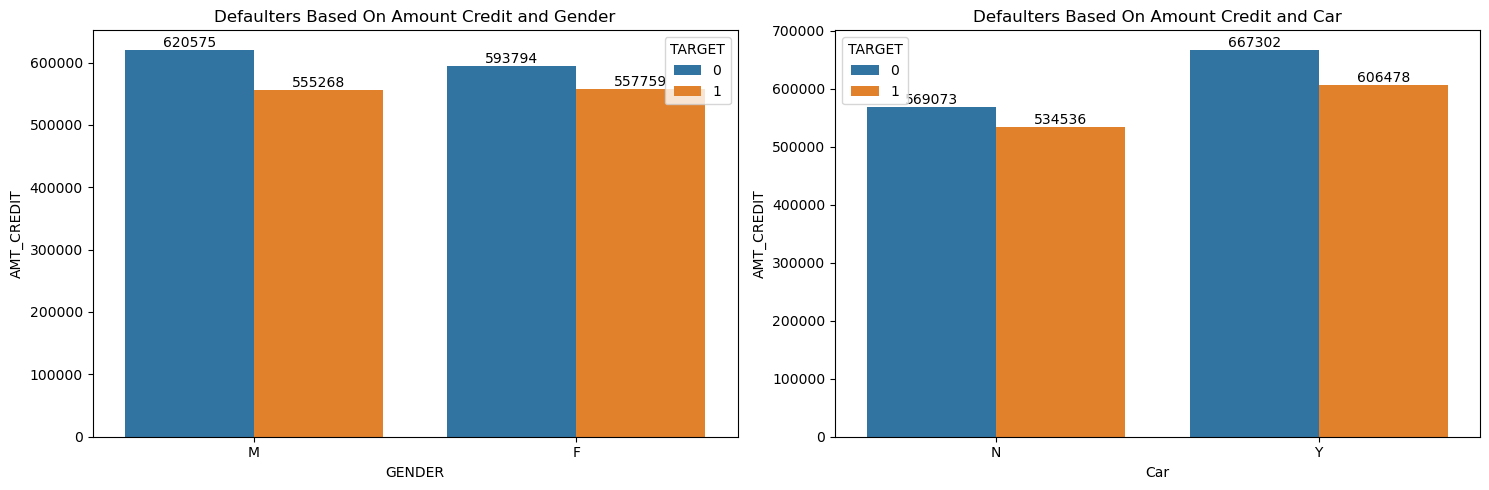

In [92]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sb.barplot(x=data['GENDER'],y=data['AMT_CREDIT'],hue=data['TARGET'],ci=False,ax=ax[0])
sb.barplot(x=data['Car'],y=data['AMT_CREDIT'],hue=data['TARGET'],ci=False,ax=ax[1])
cb(ax[0],data)
cb(ax[1],data)
ax[0].set_title('Defaulters Based On Amount Credit and Gender')
ax[1].set_title('Defaulters Based On Amount Credit and Car')
plt.tight_layout()
plt.show()

#
* Lot of male become a low defaulter using amount credit.
* Who have the car they are low possible to become a defaulter using amount credit.

# Who are low defaulter using the amt credit vs children and Family

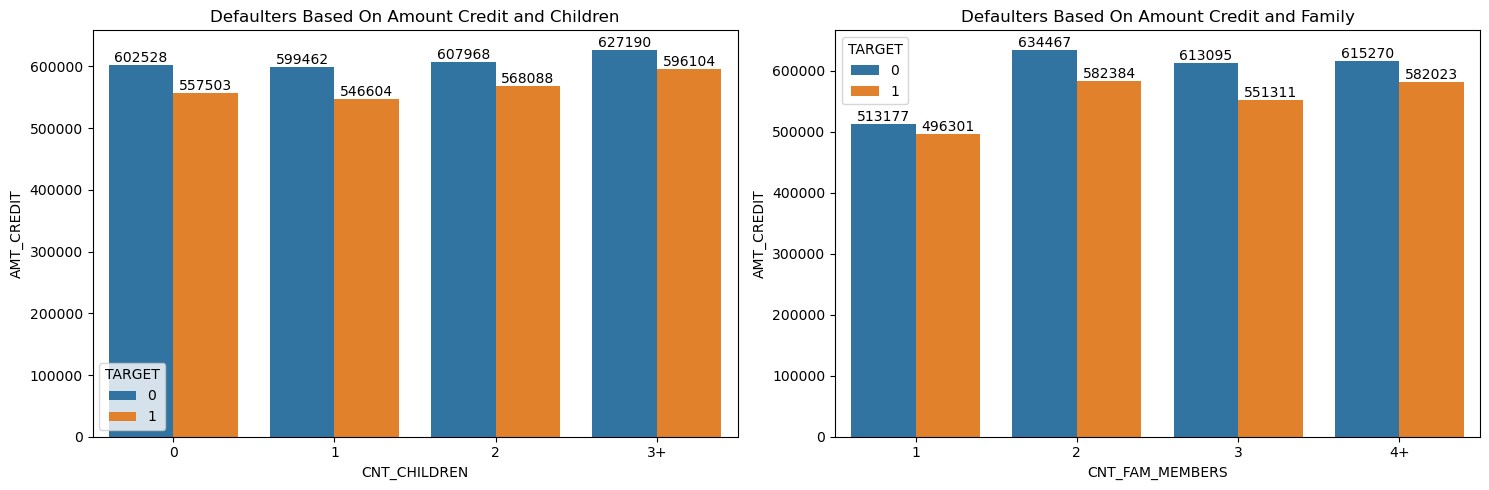

In [94]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sb.barplot(x=data['CNT_CHILDREN'],y=data['AMT_CREDIT'],hue=data['TARGET'],ci=False,ax=ax[0])
sb.barplot(x=data['CNT_FAM_MEMBERS'],y=data['AMT_CREDIT'],hue=data['TARGET'],ci=False,ax=ax[1])
cb(ax[0],data)
cb(ax[1],data)
ax[0].set_title('Defaulters Based On Amount Credit and Children')
ax[1].set_title('Defaulters Based On Amount Credit and Family')
plt.tight_layout()
plt.show()

# 
* Amount credit and children doesn't affect the become a defaulter.
* Amount credit and family members doesn't affect the become a defaulter.But one family member littlebit possible to become a defaulter.

# Who are  defaulter using the amt credit vs education type and Family status

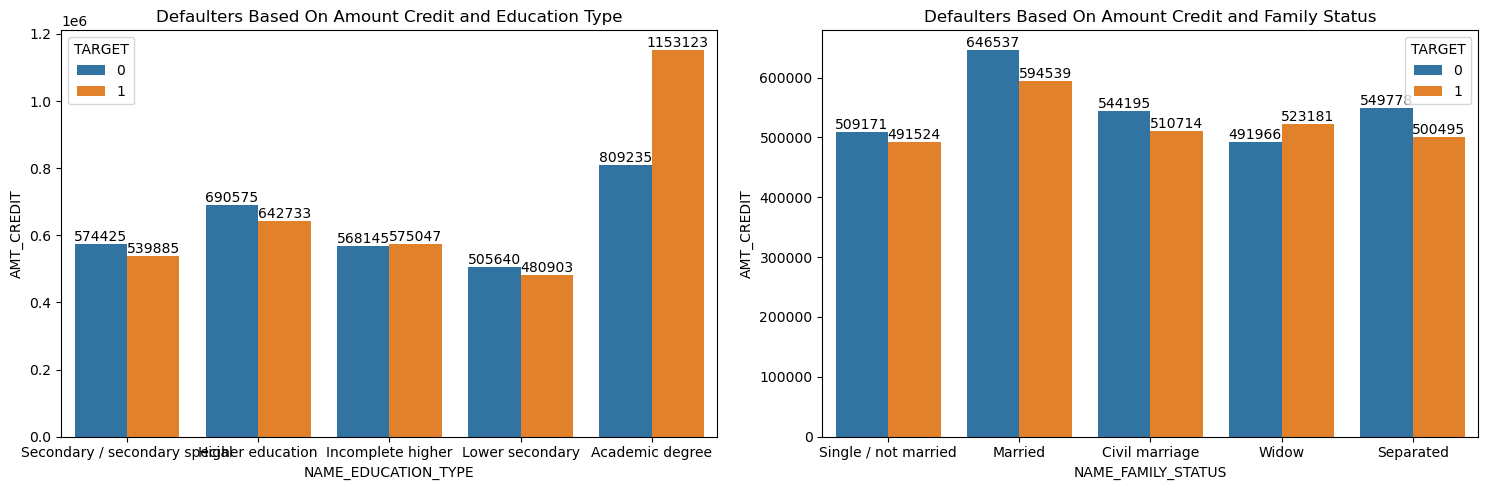

In [95]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sb.barplot(x=data['NAME_EDUCATION_TYPE'],y=data['AMT_CREDIT'],hue=data['TARGET'],ci=False,ax=ax[0])
sb.barplot(x=data['NAME_FAMILY_STATUS'],y=data['AMT_CREDIT'],hue=data['TARGET'],ci=False,ax=ax[1])
cb(ax[0],data)
cb(ax[1],data)
ax[0].set_title('Defaulters Based On Amount Credit and Education Type')
ax[1].set_title('Defaulters Based On Amount Credit and Family Status')
plt.tight_layout()
plt.show()

#
* Higher education high possible to become a low defaulter. and Academic degree who have high possible to become a high defaulter using amount credit.
* Who are married they are probability to become a low defaulter. Who are Widow they are become a high defaulter.

# Who are  defaulter using the amt credit vs document submiited 

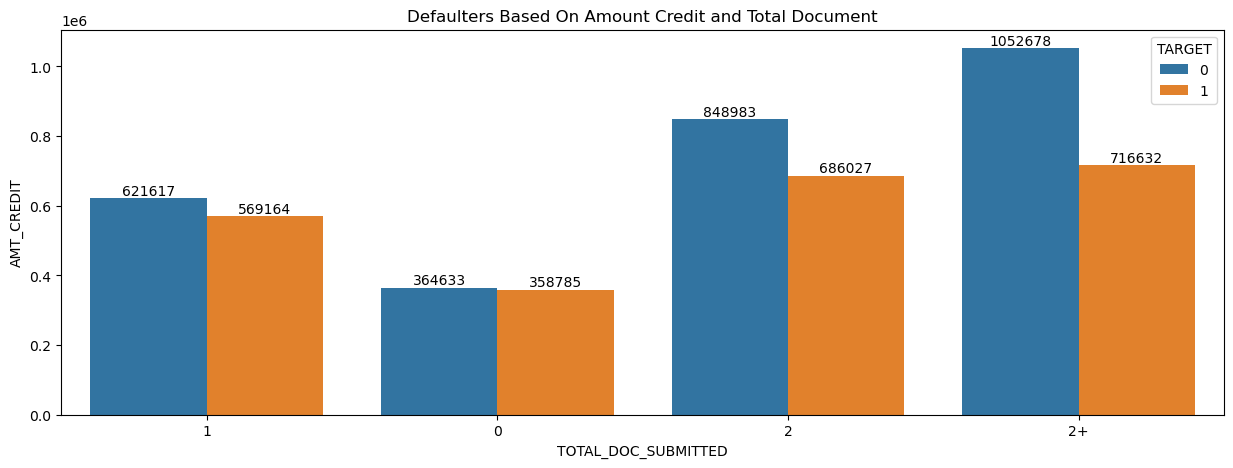

In [96]:
fig,ax=plt.subplots(figsize=(15,5))
sb.barplot(x=data['TOTAL_DOC_SUBMITTED'],y=data['AMT_CREDIT'],hue=data['TARGET'],ci=False)
cb(ax,data)
plt.title('Defaulters Based On Amount Credit and Total Document')
plt.show()

# 
* Who Are submitted More than 2 and 2+ document They are low possibity to become a defaulter bassed on amount credit.

# Who are low defaulter using the amt credit vs occupation type

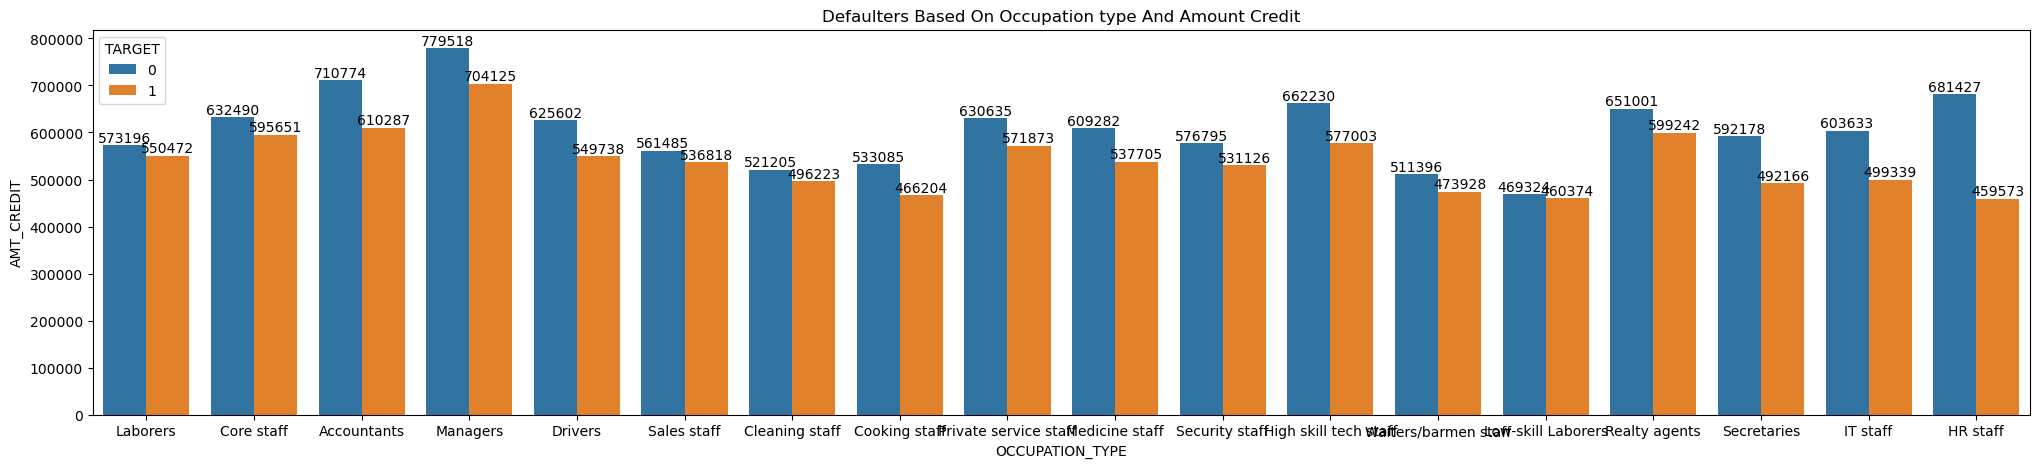

In [97]:
fig,ax=plt.subplots(figsize=(25,5))
sb.barplot(x=data['OCCUPATION_TYPE'],y=data['AMT_CREDIT'],hue=data['TARGET'],ci=False)
cb(ax,data)
plt.title("Defaulters Based On Occupation type And Amount Credit")
plt.show()

# 
* Credit amount and occupation not affect the become a defaulter.

# Who are low defaulter using the amt good price vs children and Family

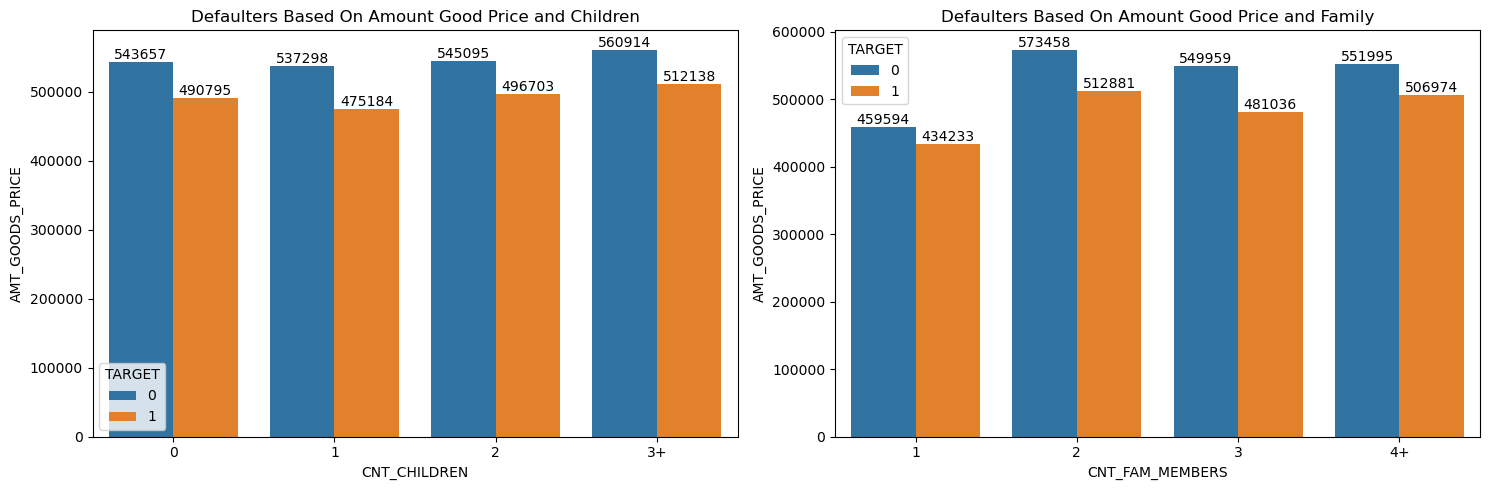

In [98]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sb.barplot(x=data['CNT_CHILDREN'],y=data['AMT_GOODS_PRICE'],hue=data['TARGET'],ci=False,ax=ax[0])
sb.barplot(x=data['CNT_FAM_MEMBERS'],y=data['AMT_GOODS_PRICE'],hue=data['TARGET'],ci=False,ax=ax[1])
cb(ax[0],data)
cb(ax[1],data)
ax[0].set_title('Defaulters Based On Amount Good Price and Children')
ax[1].set_title('Defaulters Based On Amount Good Price and Family')
plt.tight_layout()
plt.show()

# 
* Children and family count doesnt affect the defaulter based on Amount Good price.

# Recomendations:

In [ ]:
1.Lot of Application Submitted In Tuesday
2.Near By 34 % People Only Have Car
3.There are 66% customers are Female
4.Near by 70% people have own house.
5.Near by 91% peoples wants money through cash
6.Maximum Number of peoples study only secondary or secondary special
7.Unaccompained peoples are apply the loan near by 82%
8.50% Laborers are apply the loan
9.Almost 92% peoples paying correctly
10.Near by 70 % peoples dont have a child.
11.Near 95% people share their email.
12. 88% peoples submitted only one document.
13.Almost lot of people wants their loan amount range between 45000 to 150000
14.Customers Good price amount range between 10000 to 130000
15.Almost lot of peoples income comes 100000 to 175000
16.In 2 members family 48% pay properly. 65% paying on time who dont have child.
17.Alomost 61% female pay on time.64% who have house they pay on time
18.65 % secondary special study peoples pay on time.59 % married peoples pay on time.
19.47% working peoples are pay on time.75 % unaccompanied peoples are repay on time.
20.Family members count which family have 2 members. They are low probabelity to become a defaulter.Family members count which family have 3 members. They are high probabelity to become a defaulter.
21.Who have 2 children they are probabelity to be a low defaulter.Who have a one child high probabelity to be defaulter.
22.Who are under the others and State servant are be a low defaulter.Working persons high possibality to be a defaulter.
23.Males are low probabelity to become a defaulter.Females are high probabelity to become a defaulter.
24.Who have not a house they are low probabelity to become a defaulter.Who have a house they are high probabelity to become a defaulter
25.Who have cars they are low probabelity to become a defaulters.Who doesn't have cars they are high probabelity to become a defaulters.
26.Higher education studied applicant low possibility become a defaulter.Acadamic degree and secondary are high possibility to become a defaulter.
27.Manager, core staff, accountant,drivers,private service staff, Hr and It staff are low probabelity to become a defaulter.Laborers high possibility become a defaulter.
28.Amount credit and children doesn't affect the become a defaulter.Amount credit and family members doesn't affect the become a defaulter.But one family member littlebit possible to become a defaulter.
29.Higher education high possible to become a low defaulter. and Academic degree who have high possible to become a high defaulter using amount credit.Who are married they are probability to become a low defaulter. Who are Widow they are become a high defaulter.
30.Who Are submitted More than 2 and 2+ document They are low possibity to become a defaulter bassed on amount credit.